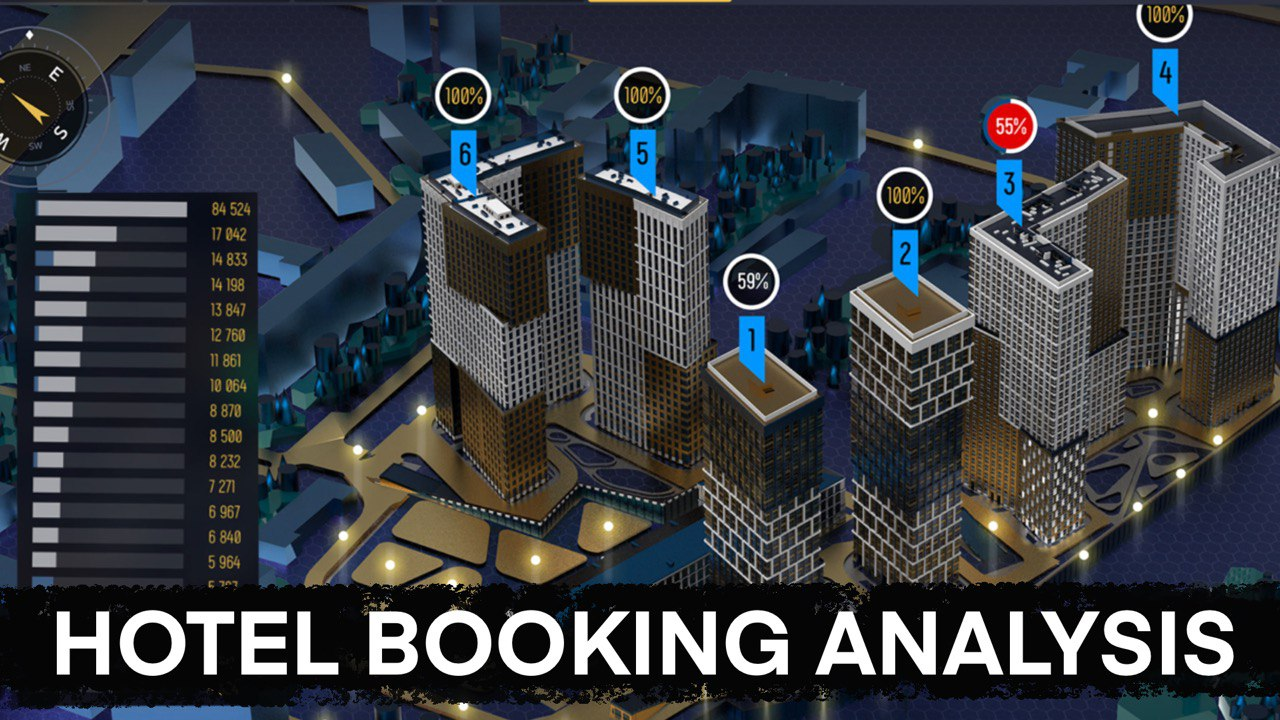

# **Exploratory Data Analysis**    - Hotel Booking Analysis



##### **Project Type**    - EDA



##### **Contribution**    - Individual
**Name** - Harsh Verma

# **Project Summary -**

This EDA project aims to explore a hotel booking dataset, encompassing data from both a city hotel and a resort hotel, with personally identifying information removed. The primary objectives include determining the best time of year to book a hotel room, identifying the optimal length of stay for obtaining the best daily rate, and predicting whether a hotel is likely to receive a disproportionately high number of special requests. By analyzing the data, we seek to discover crucial factors that influence hotel bookings, enabling the optimization of operations and enhancing overall customer experience.

# **GitHub Link -**

https://github.com/hkv-code/EDA-Hotel_Booking_Analysis

#### **Business Objective**

The business objective is to increase the amount of  bookings and optimize operations.

# **Let's Begin !**

## **1. Comprehending the Dataset**

### Import Libraries

In [271]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

plt.style.use('seaborn')

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

### Dataset Loading

In [272]:
# Load csv file present in github repository using the raw url
df = pd.read_csv('https://raw.githubusercontent.com/hkv-code/EDA-Hotel_Booking_Analysis/main/Hotel%20Bookings.csv')

### Dataset First View

In [273]:
# Dataset First Look
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [274]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### **Dataset Information**

In [275]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [276]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

print(f'{len(df[df.duplicated()])}' + ' duplicate values out of ' + f'{len(df)}')

31994 duplicate values out of 119390


#### Missing Values/Null Values

In [277]:
# Missing Values/Null Values Count
print(df.isnull().sum())




hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

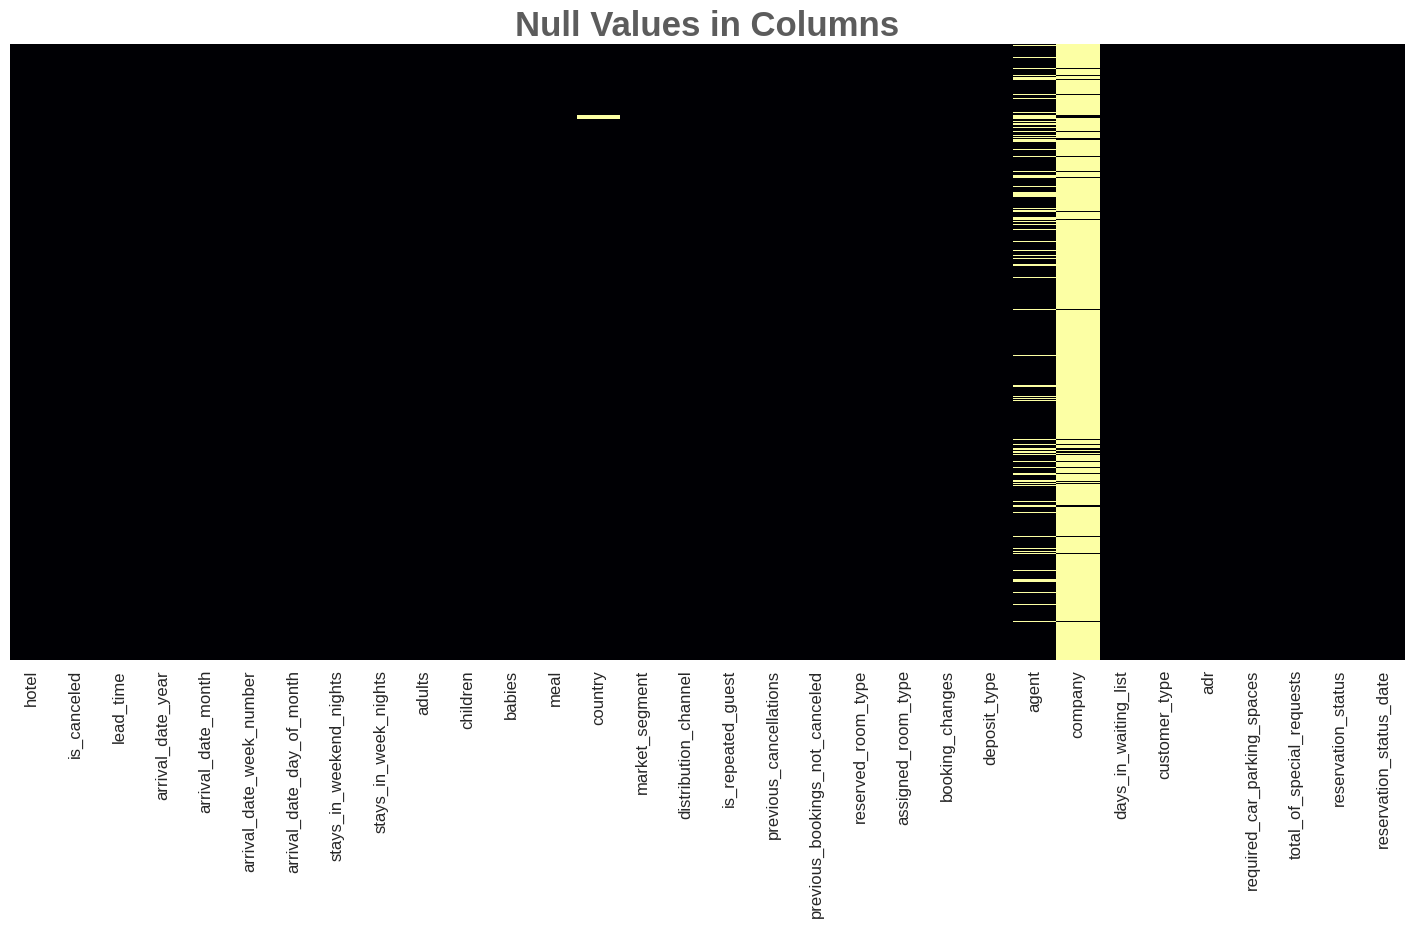

In [231]:
# Visualizing the missing values
plt.figure(figsize=(18, 8))
ax = sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='inferno')
# plt.xlabel("<---Name Of Columns--->", alpha = 0.75)
plt.title("Null Values in Columns", alpha = 0.75)
ax.tick_params(axis = 'x', labelsize= 12)

### What information can be gleaned from the dataset?



*   The dataset has **119390** rows and **32** columns.
*   It has *31994* duplicate rows.
*   The dataset has missing values in 4 columns :
  - **children** - *4* missing values
  - **country** - *488* missing values
  - **agent** - *16340* missing values
  - **company** - *112593* missing values









## **2. Familiarizing with Variables**

In [232]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Variables Description

- `hotel` - Type of hotel (City/ Resort)
- `is_canceled` - if the booking was cancelled? 0 for 'Yes', 1 for 'No'
- `lead_time` - Time between the booking into PMS(Property Management System) and the Arrival Date
- `arrival_date_year` - Year of arrival date
- `arrival_date_month` - Month of arrival date
- `arrival_date_week_number` - Week number for arrival date
- `arrival_date_day_of_month` - Day of arrival date
- `stays_in_weekend_nights`- Number of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
- `stays_in_week_nights` - Number of week nights (Mon/Tue/Wed/Thu/Fri) the guest stayed or booked to stay at the hotel
- `adults` - Number of adults
- `children` - Number of children
- `babies` - Number of babies
- `meal` - Kind of meal opted for : BB (Bed and Breakfast), FB (Full Board), HB (Half Board), SC (Self-Catering), Undefined (-)
- `country` - Country code
- `market_segment` - Which segment the customer belongs to
  - Direct: Customers who book directly with the accommodation provider.
  - Corporate: Customers who book accommodations for business-related purposes.
  - Online TA: Customers who book through online travel agencies.
  - Offline TA/TO: Customers who book through traditional offline travel agencies or tour operators.
  - Complementary: Customers who receive complimentary or free accommodations.
  - Groups: Customers who book as part of a group or organized event.
  - Undefined: Segment not specified or categorized.
  - Aviation: Customers associated with the aviation industry requiring accommodations.
- `distribution_channel`- How the customers accessed the stay
  - Direct: Customers accessed their stay directly with the accommodation provider.
  - Corporate: Customers accessed their stay through corporate channels.
  - TA/TO: Customers accessed their stay through Travel Agencies or Tour Operators.
  - Undefined: Method or channel of access is not specified or categorized.
  - GDS (Global Distribution System): Customers accessed their stay through a Global Distribution System.
- `is_repeated_guest`- Guest coming for first time or not? 1 for 'Yes', 0 for 'No'
- `previous_cancellations` - Count of previous canellations
- `previous_bookings_not_canceled` - Count of previous bookings
- `reserved_room_type` - Type of room reserved
- `assigned_room_type` - Type of room assigned
- `booking_changes` - Count of changes made to booking
- `deposit_type` - Deposity Type
  - 'No Deposit': No deposit is required for the booking.
  - 'Refundable': A deposit has been made, and it is refundable.
  - 'Non Refund': A deposit has been made, but it is non-refundable.
- `agent` - Agent id, if booked through an agent, NULL otherwise
- `company` - Company id, if booked through a company, NULL otherwise
- `days_in_waiting_list` - Number of days in waiting list
- `customer_type`- Type of customer
  - 'Transient': Individual customers who make independent bookings.
  - 'Contract': Customers with negotiated contracts or agreements.
  - 'Transient-Party': Groups of transient customers who arrive together.
  - 'Group': Customers arriving as part of a larger group or organized event.

- `adr` -  Average Daily Rate, average price paid per occupied room in a hotel over a specific time period
- `required_car_parking_spaces` - Count of Car parkings required
- `total_of_special_requests` - Number of additional special requirements
- `reservation_status` - Status of reservation
  - 'Check-Out': Indicates that the customer has completed their stay and checked out.
  - 'Canceled': Signifies that the reservation has been canceled.
  - 'No-Show': Refers to the situation where the customer did not arrive for their scheduled stay.
- `reservation_status_date` - Date of the specific reservation status


In [233]:
# Dataset Describe
df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Check Unique Values for each variable.

In [234]:
# Create a dictionary using dictionary comprehension having
# key = column name and values = unique values in that column
Unique_values_dict = {column_name: df[f'{column_name}'].unique() for column_name in df.columns}

# Print items in the dictionary
for key, value in Unique_values_dict.items():
  print(f'{key}: {value}\n') # using'\n' for readability

hotel: ['Resort Hotel' 'City Hotel']

is_canceled: [0 1]

lead_time: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 23

## **3.** ***Data Wrangling***

### **Data Wrangling Code**

**Handling Null Values**

In [235]:
# Identifying the columns having null values
columns_with_null = df.columns[df.isnull().any()].tolist()

# Finding percent of rows having null values in columns
for column in columns_with_null:
  print(f'{column}' + ' has ' + str(round((((df[f'{column}'].isnull().sum())/len(df))*100),3)) + ' percent of null values')


children has 0.003 percent of null values
country has 0.409 percent of null values
agent has 13.686 percent of null values
company has 94.307 percent of null values


In [236]:
# Dropping rows for 'children' and 'country' columns because these are minimal in number and won't significantly affect the analysis
df.dropna(subset = ['children','country'], inplace = True)

**Deleting duplicate records**

In [237]:
# Again check for Duplicate Values in the data set
len(df[df.duplicated()])

print(f'{len(df[df.duplicated()])}' + ' duplicate values out of ' + f'{len(df)}')

31958 duplicate values out of 118898


In [238]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

**Changing Data Types**

In [239]:
# change the data type of 'children' to 'int' in a single line
df[['children']] = df[['children']].astype(int)

# changing the data type of 'reservation_status_date' to date format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']).dt.date

**Handling Outliers**

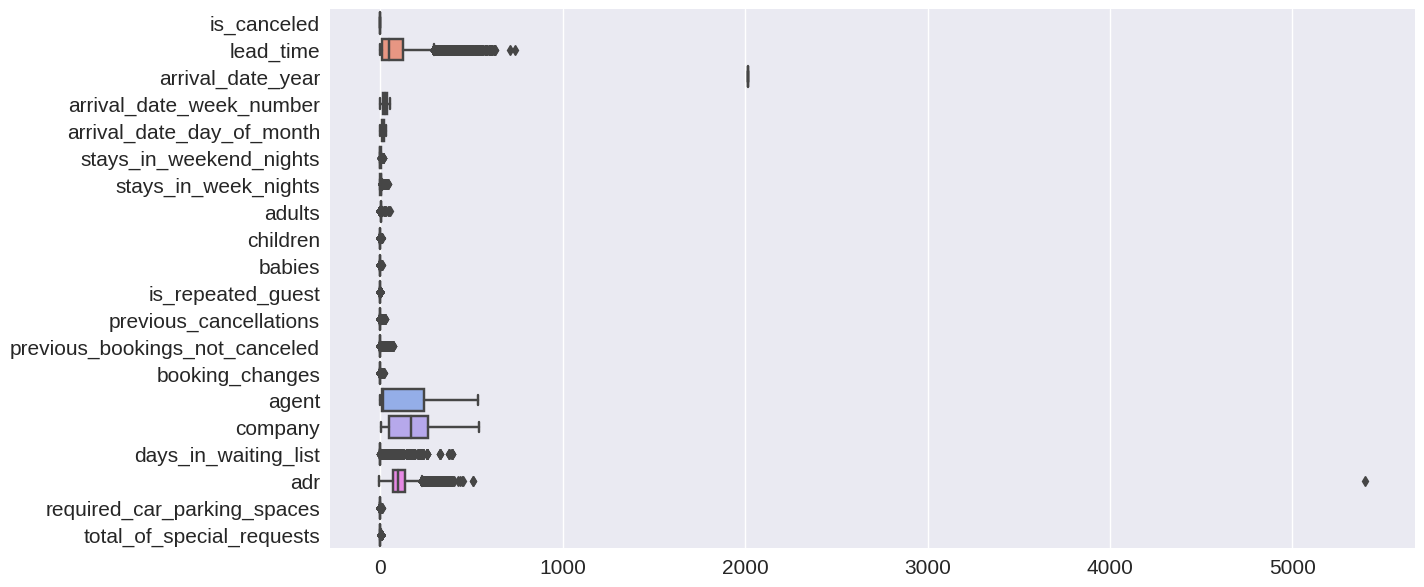

In [240]:
# Create a horizontal boxplot using Seaborn
plt.figure(figsize = (14,7))
sns.boxplot(data=df, orient = 'horizontal', );

In [241]:
# Count the number of rows where 'adr' is greater than 5000
count1 = len(df[(df['adr'] > 5000)])
# Count the number of rows where 'adr' is less than 0
count2 = len(df[(df['adr'] < 0)])
# Print the result
print(f"Number of rows where adr > 5000: {count1}")
print(f"Number of rows where adr < 0: {count2}")

Number of rows where adr > 5000: 1
Number of rows where adr < 0: 1


In [242]:
# Delete rows where 'adr' is greater than 5000 or negative
df = df[(df['adr'] >= 0) & (df['adr'] <= 5000)]

**Checking Final shape**



In [243]:
df.shape

(86938, 32)

### **What all manipulations have I done and insights I found?**

**By observing the initial type and values of the data. It can be concluded that:**
 - There were **31958** duplicate values out of **118890**.
 - The datatype of 'children' variable was float.
 - There is **1** column('reservation_status_date') in the dataset which contains the dates
 - There were **4** columns in the dataset that contained NULL values
 - 'adr' columns had 2 outliers

**Manipulations Done on the Data:**
 - Dropped rows having NULL values for 'children' and 'country' columns because these were minimal in number and won't significantly affect the analysis
 - Dropped all the Duplicate records in the dataset
 - Changed Data Type of 'children' column from float to int
 - Changed Data Type of 'reservation_status_date' to pandas datetime format
 - Removed the outliers found in 'adr' column

Final Data set contains **86938** rows and **32** columns

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **Univariate Analysis**

#### 1) Which type of hotel is mostly prefered by the guests?

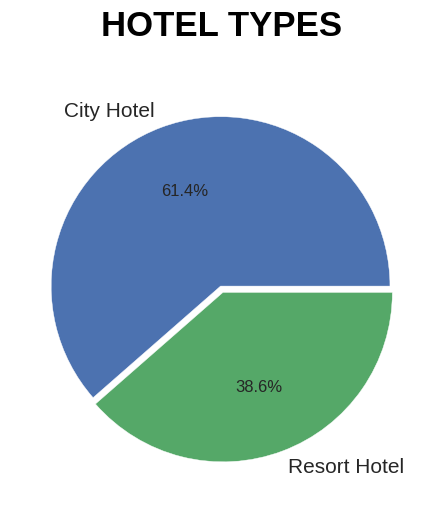

In [244]:
# Count the frequency of each category
category_counts = df['hotel'].value_counts()

# Get the category labels and their corresponding frequencies
labels = category_counts.index
frequencies = category_counts.values

# Plot the pie chart
plt.pie(frequencies, labels=labels, autopct='%1.1f%%',explode=[0.02, 0.02], shadow = False)

# Add a title
plt.title('HOTEL TYPES', pad = 30, color = 'Black');

##### 1. Why did I pick the specific chart?

I decided to use a pie chart because it is an effective way to display the proportion or percentage distribution of different categories within a whole. Pie charts are visually appealing and allow the reader to easily compare the sizes of the different categories. In my case, I had data that could be divided into distinct categories, and I wanted to highlight the composition and relative proportions of each category. The pie chart helped me achieve this goal by clearly representing how each category contributes to the whole.

##### 2. What is/are the insight(s) found from the chart?

City Hotels are preferred by most customers than Resort Hotel, however the difference is not that significant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Targeted Marketing: Knowing that the majority of customers prefer City Hotels allows businesses to tailor their marketing strategies specifically for this customer segment. They can focus their promotional efforts, advertising campaigns, and special offers towards attracting more customers to their City Hotels. This targeted approach increases the chances of attracting and retaining customers in this segment, potentially leading to increased revenue.

- Resource Allocation: Understanding the customer preference for City Hotels enables businesses to allocate their resources more efficiently. They can invest in enhancing and improving the infrastructure, services, and amenities of their City Hotels to cater to the demands and expectations of the majority of their customers. This strategic allocation of resources can improve customer satisfaction and loyalty, leading to positive word-of-mouth and repeat business.

Negative Growth Insights:
- Based on the given information, there isn't a specific negative growth insight.

#### 2) What is the cancellation Rate in All Hotels?

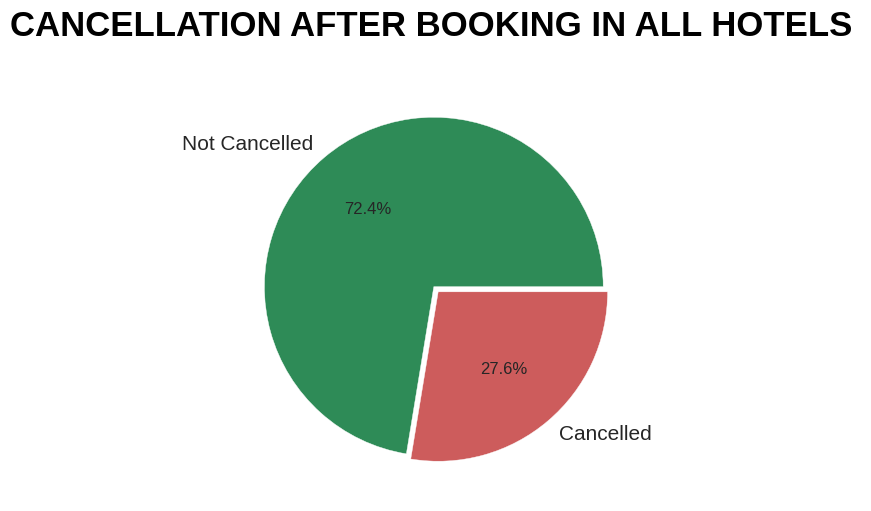

In [245]:
# Count the frequency of each category
category_counts = df['is_canceled'].value_counts()

# Get the category labels and their corresponding frequencies
labels = ['Not Cancelled', 'Cancelled']
colors = ['seagreen', 'indianred']
frequencies = category_counts.values

# Plot the pie chart
plt.pie(frequencies, labels=labels, colors = colors, autopct='%1.1f%%',explode=[0.02, 0.02], shadow = False)

# Add a title
plt.title('CANCELLATION AFTER BOOKING IN ALL HOTELS ', pad = 30, color = 'Black');

##### 1. Why did I pick the specific chart?

I decided to use a pie chart because it is an effective way to display the proportion or percentage distribution of different categories within a whole. Pie charts are visually appealing and allow the reader to easily compare the sizes of the different categories. In my case, I had data that could be divided into distinct categories, and I wanted to highlight the composition and relative proportions of each category. The pie chart helped me achieve this goal by clearly representing how each category contributes to the whole.

##### 2. What is/are the insight(s) found from the chart?

Most Customers did not Cancelled the Bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Stability: The fact that a majority of customers (72.4 percent) did not cancel their bookings suggests a higher likelihood of revenue stability for the business. This insight indicates that a significant portion of customers remained committed to their reservations, which can help maintain a steady flow of income for the business.

- Customer Satisfaction: The higher percentage of customers who did not cancel their bookings suggests a positive level of customer satisfaction or confidence in the business. It indicates that the services, amenities, and overall experience provided by the business are meeting or exceeding customer expectations. Satisfied customers are more likely to become repeat customers, provide positive reviews, and recommend the business to others, contributing to positive growth.

Negative Growth Insights:
The insight that 27.6 percent of customers canceled their bookings raises potential concerns and could lead to negative growth for the business. Here's the justification:

- Revenue Loss: Customer cancellations directly impact the business's revenue. The higher the cancellation rate, the greater the potential loss of income. If a significant number of customers are canceling their bookings, it indicates dissatisfaction, change in plans, or potential issues with the business's services or policies. Revenue loss due to cancellations can impact financial stability and hinder growth opportunities.

- Customer Dissatisfaction: A higher cancellation rate can be an indicator of customer dissatisfaction. It suggests that a notable portion of customers may have encountered issues or concerns that led them to cancel their bookings. It is crucial for the business to investigate the reasons behind these cancellations and address any underlying problems to improve customer satisfaction and retain customers in the future.

#### 3) What is the cancellation Rate in Resort Hotels?

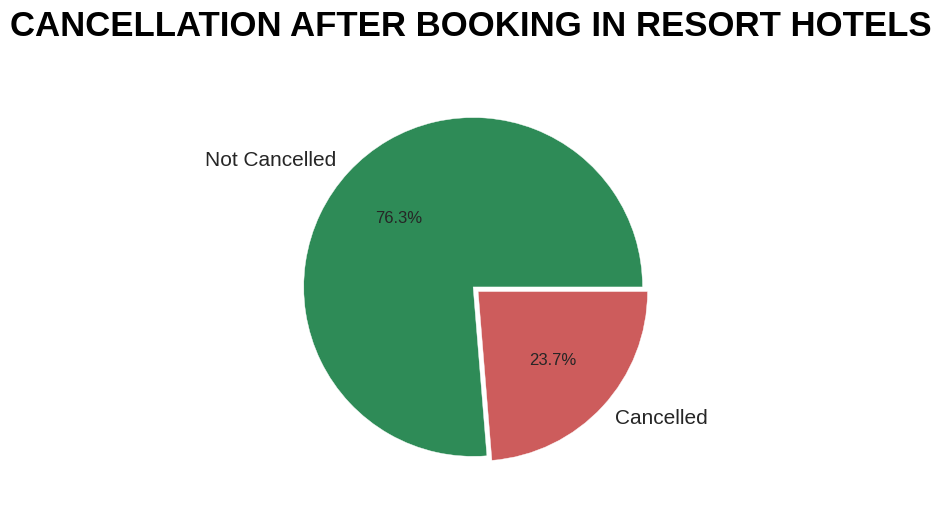

In [246]:
resort_hotel_df = df[df['hotel'] == 'Resort Hotel']

# Count the frequency of each category
category_counts = resort_hotel_df['is_canceled'].value_counts()

# Get the category labels and their corresponding frequencies
labels = ['Not Cancelled', 'Cancelled']
colors = ['seagreen', 'indianred']
frequencies = category_counts.values

# Plot the pie chart
plt.pie(frequencies, labels=labels, colors = colors, autopct='%1.1f%%',explode=[0.02, 0.02], shadow = False)

# Add a title
plt.title('CANCELLATION AFTER BOOKING IN RESORT HOTELS ', pad = 30, color = 'Black');

##### 1. Why did I pick the specific chart?

I decided to use a pie chart because it is an effective way to display the proportion or percentage distribution of different categories within a whole. Pie charts are visually appealing and allow the reader to easily compare the sizes of the different categories. In my case, I had data that could be divided into distinct categories, and I wanted to highlight the composition and relative proportions of each category. The pie chart helped me achieve this goal by clearly representing how each category contributes to the whole.

##### 2. What is/are the insight(s) found from the chart?

Most Customers did not Cancelled the Bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Stability: The fact that a majority of customers (72.4 percent) did not cancel their bookings suggests a higher likelihood of revenue stability for the business. This insight indicates that a significant portion of customers remained committed to their reservations, which can help maintain a steady flow of income for the business.

- Customer Satisfaction: The higher percentage of customers who did not cancel their bookings suggests a positive level of customer satisfaction or confidence in the business. It indicates that the services, amenities, and overall experience provided by the business are meeting or exceeding customer expectations. Satisfied customers are more likely to become repeat customers, provide positive reviews, and recommend the business to others, contributing to positive growth.

Negative Growth Insights:
The insight that 27.6 percent of customers canceled their bookings raises potential concerns and could lead to negative growth for the business. Here's the justification:

- Revenue Loss: Customer cancellations directly impact the business's revenue. The higher the cancellation rate, the greater the potential loss of income. If a significant number of customers are canceling their bookings, it indicates dissatisfaction, change in plans, or potential issues with the business's services or policies. Revenue loss due to cancellations can impact financial stability and hinder growth opportunities.

- Customer Dissatisfaction: A higher cancellation rate can be an indicator of customer dissatisfaction. It suggests that a notable portion of customers may have encountered issues or concerns that led them to cancel their bookings. It is crucial for the business to investigate the reasons behind these cancellations and address any underlying problems to improve customer satisfaction and retain customers in the future.

#### 4) What is the cancellation Rate in City Hotels?

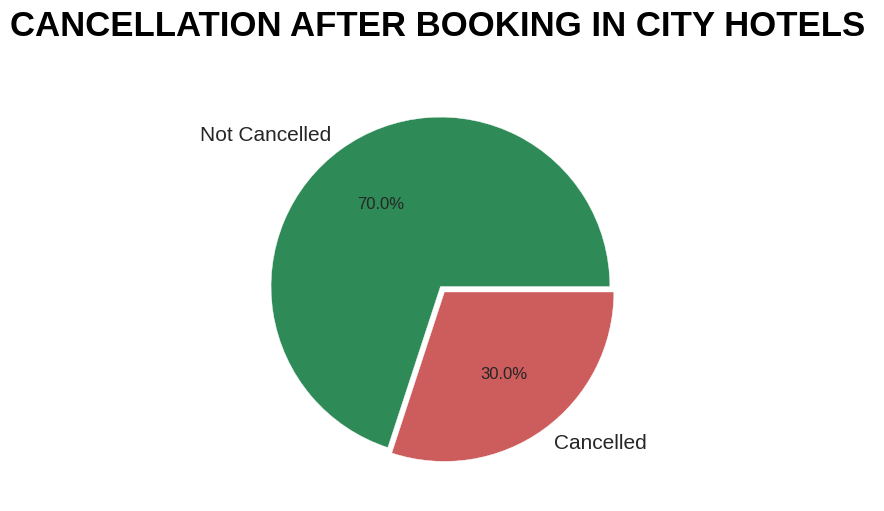

In [247]:
city_hotel_df = df[df['hotel'] == 'City Hotel']

# Count the frequency of each category
category_counts = city_hotel_df['is_canceled'].value_counts()

# Get the category labels and their corresponding frequencies
labels = ['Not Cancelled', 'Cancelled']
colors = ['seagreen', 'indianred']
frequencies = category_counts.values

# Plot the pie chart
plt.pie(frequencies, labels=labels, colors = colors, autopct='%1.1f%%',explode=[0.02, 0.02], shadow = False)

# Add a title
plt.title('CANCELLATION AFTER BOOKING IN CITY HOTELS ', pad = 30, color = 'Black');


##### 1. Why did I pick the specific chart?

I decided to use a pie chart because it is an effective way to display the proportion or percentage distribution of different categories within a whole. Pie charts are visually appealing and allow the reader to easily compare the sizes of the different categories. In my case, I had data that could be divided into distinct categories, and I wanted to highlight the composition and relative proportions of each category. The pie chart helped me achieve this goal by clearly representing how each category contributes to the whole.

##### 2. What is/are the insight(s) found from the chart?

Most Customers did not cancel the bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Stability: The fact that a majority of customers (72.4 percent) did not cancel their bookings suggests a higher likelihood of revenue stability for the business. This insight indicates that a significant portion of customers remained committed to their reservations, which can help maintain a steady flow of income for the business.

- Customer Satisfaction: The higher percentage of customers who did not cancel their bookings suggests a positive level of customer satisfaction or confidence in the business. It indicates that the services, amenities, and overall experience provided by the business are meeting or exceeding customer expectations. Satisfied customers are more likely to become repeat customers, provide positive reviews, and recommend the business to others, contributing to positive growth.

Negative Growth Insights:
The insight that 27.6 percent of customers canceled their bookings raises potential concerns and could lead to negative growth for the business. Here's the justification:

- Revenue Loss: Customer cancellations directly impact the business's revenue. The higher the cancellation rate, the greater the potential loss of income. If a significant number of customers are canceling their bookings, it indicates dissatisfaction, change in plans, or potential issues with the business's services or policies. Revenue loss due to cancellations can impact financial stability and hinder growth opportunities.

- Customer Dissatisfaction: A higher cancellation rate can be an indicator of customer dissatisfaction. It suggests that a notable portion of customers may have encountered issues or concerns that led them to cancel their bookings. It is crucial for the business to investigate the reasons behind these cancellations and address any underlying problems to improve customer satisfaction and retain customers in the future.

#### 5) How many customers repeated the bookings?

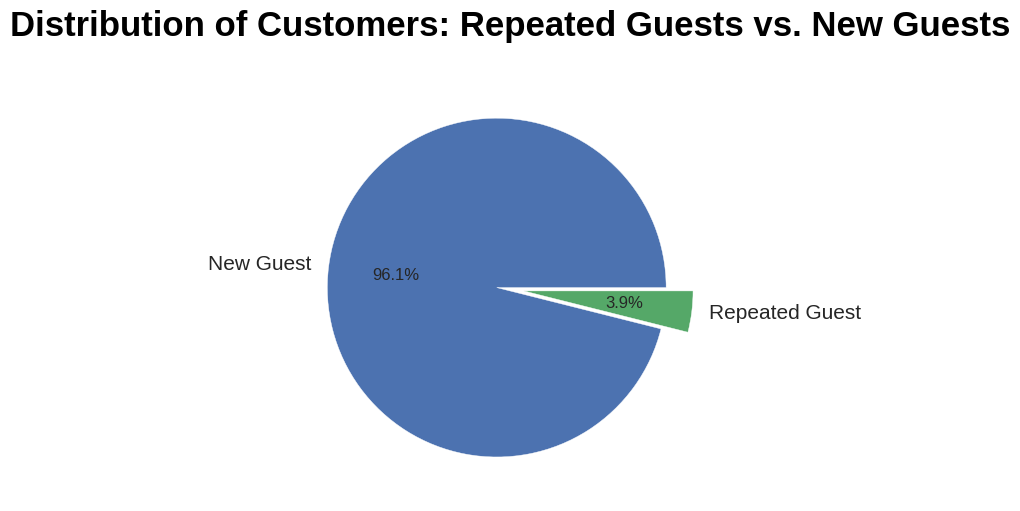

In [248]:
# Count the frequency of each category
category_counts = df['is_repeated_guest'].value_counts()

# Get the category labels and their corresponding frequencies
labels = ['New Guest','Repeated Guest']
frequencies = category_counts.values

# Plot the pie chart
plt.pie(frequencies, labels=labels, autopct='%1.1f%%',explode=[0.08, 0.08], shadow = False)

# Add a title
plt.title('Distribution of Customers: Repeated Guests vs. New Guests', pad = 30, color = 'Black');

##### 1. Why did I pick the specific chart?

I decided to use a pie chart because it is an effective way to display the proportion or percentage distribution of different categories within a whole. Pie charts are visually appealing and allow the reader to easily compare the sizes of the different categories. In my case, I had data that could be divided into distinct categories, and I wanted to highlight the composition and relative proportions of each category. The pie chart helped me achieve this goal by clearly representing how each category contributes to the whole.

##### 2. What is/are the insight(s) found from the chart?

3.9 percent were repeated Guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Customer Loyalty: The presence of repeated guests indicates a level of customer loyalty towards the business. These guests have chosen to return and book with the business again, which suggests a positive experience and satisfaction with the previous stay. Repeat customers are valuable as they tend to spend more, provide positive reviews, and are more likely to recommend the business to others. The insights gained can help the business focus on nurturing and retaining these loyal customers, leading to positive business impact.

- Brand Reputation: The presence of repeated guests contributes to the overall brand reputation of the business. When guests choose to return and become repeat customers, it reflects positively on the services, amenities, and overall experience provided by the business. This reputation can attract new customers, enhance credibility, and positively impact business growth.

Negative Growth Insights:
Based on the given information, there isn't a specific negative growth insight related to the percentage of repeated guests. However, it's important to consider the context and industry standards. If the percentage of repeated guests is significantly lower compared to industry benchmarks or competitors, it may indicate a potential area of concern.

Justification:

- Missed Opportunities: If the percentage of repeated guests is relatively low, it suggests that the business might not be effectively capturing or retaining customer loyalty. It could indicate missed opportunities to cultivate customer relationships and encourage repeat visits. This insight highlights the need for the business to focus on strategies such as loyalty programs, personalized offers, or improved guest engagement to increase the percentage of repeated guests.

- Competitor Comparison: If the business has a lower percentage of repeated guests compared to competitors, it may indicate that the competitors are excelling in customer retention and loyalty-building efforts. This could result in negative growth for the business as they may be losing potential repeat customers to their competitors.

In conclusion, while the presence of repeated guests signifies customer loyalty and positive brand reputation, the relatively low percentage of repeated guests may highlight missed opportunities for the business and potential negative growth. To create a positive business impact, it is important for the business to focus on enhancing customer loyalty programs, improving guest experiences, and implementing strategies to increase the percentage of repeated guests. By fostering customer loyalty and increasing repeat bookings, the business can achieve positive growth and strengthen its market position.

#### 6) What type of deposit was preferred by cutomers at the time of booking?

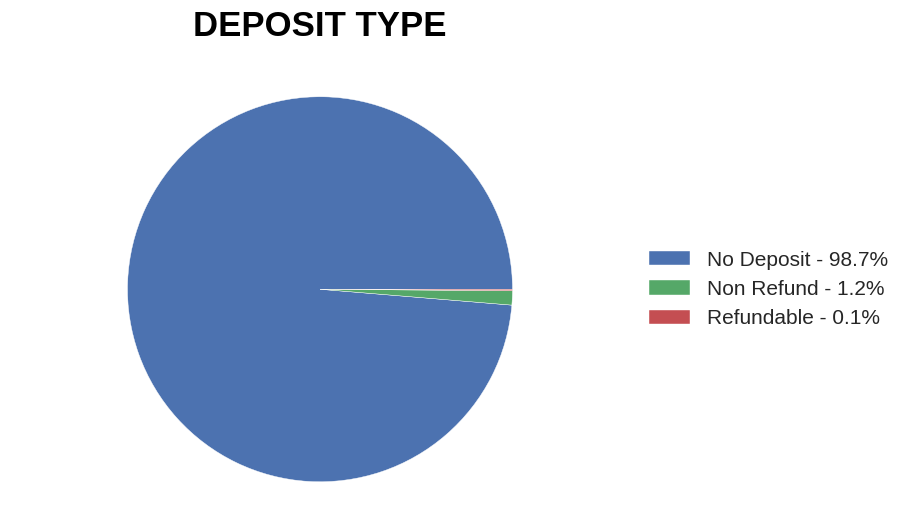

In [249]:
# Count the frequency of each category
category_counts = df['deposit_type'].value_counts()

# Get the category labels and their corresponding frequencies
labels = category_counts.index
frequencies = category_counts.values

# Plot the pie chart
plt.pie(frequencies, labels=None, shadow=False)

# Add a title
plt.title('DEPOSIT TYPE', pad=30, color='black')

# Calculate the percentages
percentages = [(freq/sum(frequencies))*100 for freq in frequencies]

# Create the legend labels with percentages
legend_labels = ['{} - {:.1f}%'.format(label, percentage) for label, percentage in zip(labels, percentages)]

# Add a legend with percentages
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Ensure the pie chart is circular
plt.axis('equal');

##### 1. Why did I pick the specific chart?

I decided to use a pie chart because it is an effective way to display the proportion or percentage distribution of different categories within a whole. Pie charts are visually appealing and allow the reader to easily compare the sizes of the different categories. In my case, I had data that could be divided into distinct categories, and I wanted to highlight the composition and relative proportions of each category. The pie chart helped me achieve this goal by clearly representing how each category contributes to the whole.

##### 2. What is/are the insight(s) found from the chart?

Almost 96.7% customers opted for No Deposit, 1.2 percent customers opted for Non-Refun Deposit and 0.1 percent cutomers opted for Refundable Deposit type while booking the hotels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Attracting More Customers: The high percentage of customers opting for No Deposit indicates that this policy is preferred by the majority of customers. It suggests that customers value the flexibility and convenience of not having to make a deposit when booking hotels. By offering a No Deposit option, the business can attract a larger customer base and potentially increase bookings.

- Customer Satisfaction: The preference for No Deposit suggests that customers appreciate a risk-free booking experience. This can lead to higher customer satisfaction as they have the freedom to make changes or cancel their bookings without financial obligations. Satisfied customers are more likely to provide positive feedback, repeat bookings, and recommend the business to others, which can contribute to positive growth.

Negative Growth Insights:
Based on the given information, there isn't a specific negative growth insight related to the deposit types. However, it's important to consider potential considerations and balance with business goals.

Justification:

- Revenue and Risk Management: While the high percentage of customers opting for No Deposit is favorable in terms of attracting customers, it may present challenges from a revenue and risk management perspective. Without deposits, the business may face a higher risk of cancellations and no-shows, which can lead to revenue loss. It is crucial for the business to carefully assess the impact of the chosen deposit policies on revenue and implement appropriate strategies to mitigate risks, such as offering incentives for non-refundable bookings or implementing cancellation policies.

- Competitor Analysis: It is important to consider the deposit policies offered by competitors in the industry. If competitors are offering more favorable deposit options, such as flexible refundable deposits, it could potentially impact the business's ability to attract customers and result in negative growth. The business should monitor and assess competitor practices to stay competitive and ensure the chosen deposit policies align with customer preferences and market trends.

In conclusion, while the high percentage of customers opting for No Deposit indicates potential benefits in terms of attracting customers and increasing satisfaction, there are considerations for revenue and risk management. The business should carefully evaluate the impact of deposit policies on revenue and adjust strategies accordingly. Additionally, monitoring and adapting to competitor practices can help maintain a competitive edge and avoid potential negative growth.

#### 7) What is the status of reservation?

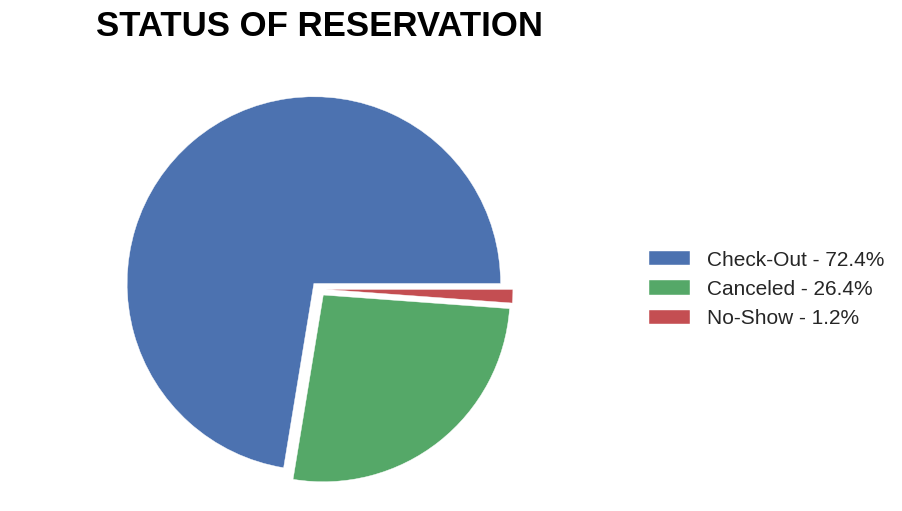

In [250]:
# Count the frequency of each category
category_counts = df['reservation_status'].value_counts()

# Get the category labels and their corresponding frequencies
labels = category_counts.index
frequencies = category_counts.values

# Plot the pie chart
plt.pie(frequencies, labels=None, explode=[0.04, 0.04, 0.04], shadow=False)

# Add a title
plt.title('STATUS OF RESERVATION', pad=30, color='black')

# Calculate the percentages
percentages = [(freq/sum(frequencies))*100 for freq in frequencies]

# Create the legend labels with percentages
legend_labels = ['{} - {:.1f}%'.format(label, percentage) for label, percentage in zip(labels, percentages)]

# Add a legend with percentages
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Ensure the pie chart is circular
plt.axis('equal');

##### 1. Why did I pick the specific chart?

I decided to use a pie chart because it is an effective way to display the proportion or percentage distribution of different categories within a whole. Pie charts are visually appealing and allow the reader to easily compare the sizes of the different categories. In my case, I had data that could be divided into distinct categories, and I wanted to highlight the composition and relative proportions of each category. The pie chart helped me achieve this goal by clearly representing how each category contributes to the whole.

##### 2. What is/are the insight(s) found from the chart?

It is found that 72.4 percent of the bookings were checked out, 26.4 perent bookings got canceled and 1.2 percent were No-Show.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:
  - The observation that 72.4 percent of the bookings were checked out indicates a majority of successful stays. This implies higher revenue generation and customer satisfaction, which can contribute to a positive business impact.
  - The low percentage of No-Show bookings (1.2 percent) suggests effective reservation management and reduced loss of potential revenue. This indicates positive operational efficiency and customer engagement, which can further enhance the positive business impact.

- Negative Growth Insights:
  - The high cancellation rate of 26.4 percent could potentially lead to negative growth. A significant number of cancellations can result in revenue loss and operational challenges. It is important for the business to analyze the reasons for cancellations and identify areas for improvement to minimize cancellations and mitigate their impact on revenue and operational efficiency. By addressing the factors contributing to cancellations, the business can strive to achieve positive growth.


#### 8) What are the top 10 countries in terms of Guest counts?

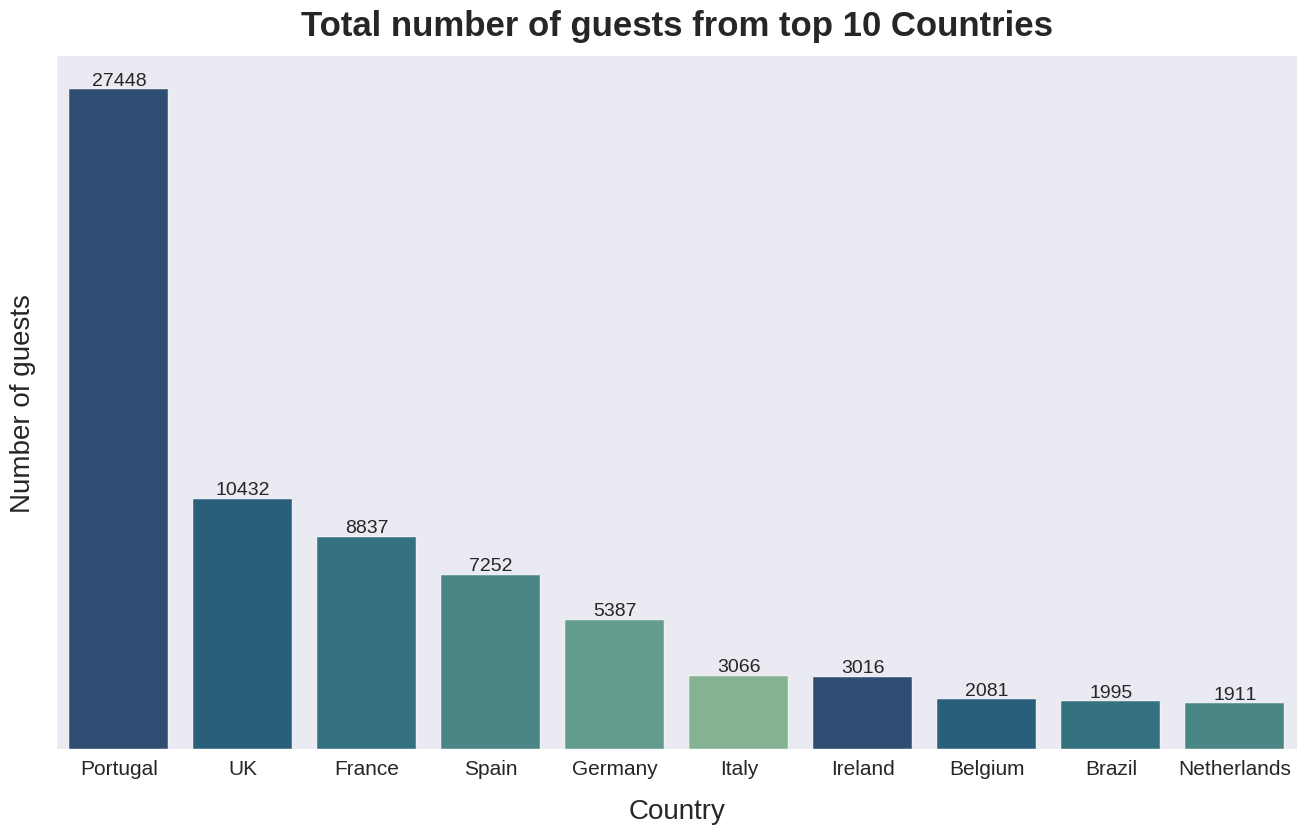

In [251]:
# Define the country code list and corresponding country names
country_codes = ['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE',
                 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
                 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT',
                 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN',
                 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL',
                 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC',
                 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
                 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY',
                 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
                 'KNA', 'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK', 'NIC', 'BEN', 'VGB', 'TZA',
                 'GAB', 'GHA', 'TMP', 'GLP', 'KEN', 'LIE', 'GNB', 'MNE', 'UMI', 'MYT', 'FRO', 'MMR', 'PAN', 'BFA',
                 'LBY', 'MLI', 'NAM', 'BOL', 'PRY', 'BRB', 'ABW', 'AIA', 'SLV', 'DMA', 'PYF', 'GUY', 'LCA', 'ATA',
                 'GTM', 'ASM', 'MRT', 'NCL', 'KIR', 'SDN', 'ATF', 'SLE', 'LAO']

country_names = ['Portugal', 'UK', 'United States', 'Spain', 'Ireland', 'France', 'Romania', 'Norway',
                 'Oman', 'Argentina', 'Poland', 'Germany', 'Belgium', 'Switzerland', 'China', 'Greece', 'Italy',
                 'Netherlands', 'Denmark', 'Russia', 'Sweden', 'Australia', 'Estonia', 'Czech Republic', 'Brazil',
                 'Finland', 'Mozambique', 'Botswana', 'Luxembourg', 'Slovenia', 'Albania', 'India', 'China',
                 'Mexico', 'Morocco', 'Ukraine', 'San Marino', 'Latvia', 'Puerto Rico', 'Serbia', 'Chile', 'Austria',
                 'Belarus', 'Lithuania', 'Turkey', 'South Africa', 'Angola', 'Israel', 'Cayman Islands', 'Zambia',
                 'Cape Verde', 'Zimbabwe', 'Algeria', 'South Korea', 'Costa Rica', 'Hungary', 'United Arab Emirates',
                 'Tunisia', 'Jamaica', 'Croatia', 'Hong Kong', 'Iran', 'Georgia', 'Andorra', 'Gibraltar', 'Uruguay',
                 'Jersey', 'Central African Republic', 'Cyprus', 'Colombia', 'Guernsey', 'Kuwait', 'Nigeria',
                 'Maldives', 'Venezuela', 'Slovakia', 'Fiji', 'Kazakhstan', 'Pakistan', 'Indonesia', 'Lebanon',
                 'Philippines', 'Senegal', 'Seychelles', 'Azerbaijan', 'Bahrain', 'New Zealand', 'Thailand',
                 'Dominican Republic', 'Macedonia', 'Malaysia', 'Armenia', 'Japan', 'Sri Lanka', 'Cuba', 'Cameroon',
                 'Bosnia and Herzegovina', 'Mauritius', 'Comoros', 'Suriname', 'Uganda', 'Bulgaria', "Côte d'Ivoire",
                 'Jordan', 'Syria', 'Singapore', 'Burundi', 'Saudi Arabia', 'Vietnam', 'Palau', 'Qatar', 'Egypt',
                 'Peru', 'Malta', 'Malawi', 'Ecuador', 'Madagascar', 'Iceland', 'Uzbekistan', 'Nepal', 'Bahamas',
                 'Macao', 'Togo', 'Taiwan', 'Djibouti', 'São Tomé and Príncipe', 'Saint Kitts and Nevis', 'Ethiopia',
                 'Iraq', 'Honduras', 'Rwanda', 'Cambodia', 'Monaco', 'Bangladesh', 'Isle of Man', 'Tajikistan',
                 'Nicaragua', 'Benin', 'British Virgin Islands', 'Tanzania', 'Gabon', 'Ghana', 'East Timor',
                 'Guadeloupe', 'Kenya', 'Liechtenstein', 'Guinea-Bissau', 'Montenegro', 'United States Minor Outlying Islands',
                 'Mayotte', 'Faroe Islands', 'Myanmar', 'Panama', 'Burkina Faso', 'Libya', 'Mali', 'Namibia',
                 'Bolivia', 'Paraguay', 'Barbados', 'Aruba', 'Anguilla', 'El Salvador', 'Dominica', 'French Polynesia',
                 'Guyana', 'Saint Lucia', 'Antarctica', 'Guatemala', 'American Samoa', 'Mauritania', 'New Caledonia',
                 'Kiribati', 'Sudan', 'French Southern Territories', 'Sierra Leone', 'Laos']

# Count the frequency of each country
country_df = df['country'].value_counts().rename_axis('country').reset_index(name='count of guests').sort_values(by='count of guests', ascending=False)[:10]

# Map country codes to country names
country_df['country'] = country_df['country'].map(dict(zip(country_codes, country_names)))

# Visualizing by plotting the graph
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=country_df['country'], y=country_df['count of guests'], palette = sns.color_palette("crest_r"))
plt.xlabel('Country', labelpad=15)
plt.ylabel('Number of guests', labelpad = 15)

# Remove the y-ticks
plt.yticks([])

# Add the value labels
for i, v in enumerate(country_df['count of guests']):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=14)

plt.title("Total number of guests from top 10 Countries", pad=15);

In [252]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered at a specific location
map = folium.Map(location=[30.6034, 1.8883], zoom_start=3, width='40%', height='40%')

# Create a dictionary containing the latitude and longitude values for the top 10 countries
country_lat_lon = {
    'Portugal': (39.3999, -8.2245),
    'UK': (55.3781, -3.4360),
    'France': (46.6034, 1.8883),
    'Spain': (40.4637, -3.7492),
    'Germany': (51.1657, 10.4515),
    'Italy': (41.8719, 12.5674),
    'Ireland': (53.1424, -7.6921),
    'Belgium': (50.5039, 4.4699),
    'Brazil': (-14.2350, -51.9253),
    'Netherlands': (52.1326, 5.2913)
}

# Define the function which will return the location of a country
def get_lat_lon(country):
    return country_lat_lon.get(country, (0, 0))  # Return (0, 0) if country not found in the dictionary

# Find the country with the highest number of guests
max_guest_country = country_df.iloc[0,0]

# Loop through the country data and add markers to the map
for index, row in country_df.iterrows():
    country = row['country']  # Get the country name from the 'country' column
    count = row['count of guests']  # Get the count of guests from the 'count of guests' column
    lat, lon = get_lat_lon(country)  # Get the latitude and longitude for the country

    # Create a marker for the country with a popup showing the country name and guest count
    marker_color = 'red' if country == max_guest_country else 'blue'  # Set marker color to red for the country with the highest guest count
    marker = folium.Marker(location=[lat, lon], popup=f"{country}: {count} guests", icon=folium.Icon(color=marker_color))
    marker.add_to(map)  # Add the marker to the map

# Display the map
map

##### 1. Why did I pick the specific chart?

I opted for a bar chart because it is a versatile chart type that allows for easy comparison between different categories or groups. I had data where I needed to compare values across different categories, and the bar chart was an ideal choice for this purpose. The rectangular bars in the chart enabled me to represent each category's value accurately, and the reader could easily interpret the differences in values between categories.
Also, I represented the data in map using folium library.By displaying the country with the highest number of guests on a map, it provides an immediate understanding of the country's geographical location.

##### 2. What is/are the insight(s) found from the chart?

- Portugal (PRT) has the highest number of guests with a count of 27,449, followed by the United Kingdom (GBR) with 10,433 guests.
- France (FRA) has the third highest number of guests with 8,837, followed by Spain (ESP) with 7,252 guests.
- Germany (DEU) has 5,387 guests, making it the fifth highest in terms of guest count.
- Italy (ITA) and Ireland (IRL) have relatively similar guest counts with 3,066 and 3,016 respectively.
- Belgium (BEL), Brazil (BRA), and the Netherlands (NLD) have guest counts ranging from 1,911 to 2,081.

Insights:
- Market Dominance: Portugal (PRT) stands out as the leading market with a significantly higher number of guests compared to other countries. This suggests a strong market presence and potential opportunities for further growth in targeting Portuguese guests.
- International Reach: The presence of countries like the United Kingdom (GBR), France (FRA), Spain (ESP), Germany (DEU), Italy (ITA), and Ireland (IRL) in the top 10 indicates the business's international reach and diverse customer base.
- Regional Focus: The presence of neighboring countries such as Belgium (BEL) and the Netherlands (NLD) within the top 10 suggests a focus on attracting guests from nearby regions.

These insights can help the business identify key markets, refine marketing strategies, and allocate resources effectively to maximize growth and revenue potential.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Will the gained insights help create a positive business impact?

The gained insights regarding the top 10 countries in terms of the number of guests can potentially create a positive business impact. Identifying the countries with the highest number of guests allows the business to focus its marketing efforts and tailor services to cater to the specific preferences and needs of these countries. By understanding the customer base from these countries, the business can implement targeted marketing strategies, provide customized experiences, and enhance customer satisfaction. This can lead to increased bookings, positive word-of-mouth, and ultimately a positive impact on business growth.

Are there any insights that lead to negative growth? Justify with specific reasons.

Based on the given observation, there are no specific insights that directly lead to negative growth. However, it's important to consider certain factors:
- Market Saturation: If the business heavily relies on these top 10 countries and fails to diversify its customer base, it may face challenges if there is a decline in demand from these countries. Over-dependence on a few countries can increase the risk of negative growth in the event of economic or political changes that affect travel patterns from these specific markets.
- Competitor Analysis: It's essential to consider the competitive landscape and analyze how other businesses are attracting guests from these countries. If competitors have a stronger foothold in these markets or are implementing more effective strategies, it could negatively impact the business's ability to attract guests from these countries. The business should continuously monitor and adapt its marketing and operational strategies to stay competitive and avoid negative growth.

Overall, while the insights gained regarding the top 10 countries can contribute to a positive business impact, it's important for the business to diversify its customer base, monitor market changes, and adapt to competition to mitigate any potential negative growth risks.



#### 9) What is the monthly distribution of Bookings in different types of hotels?

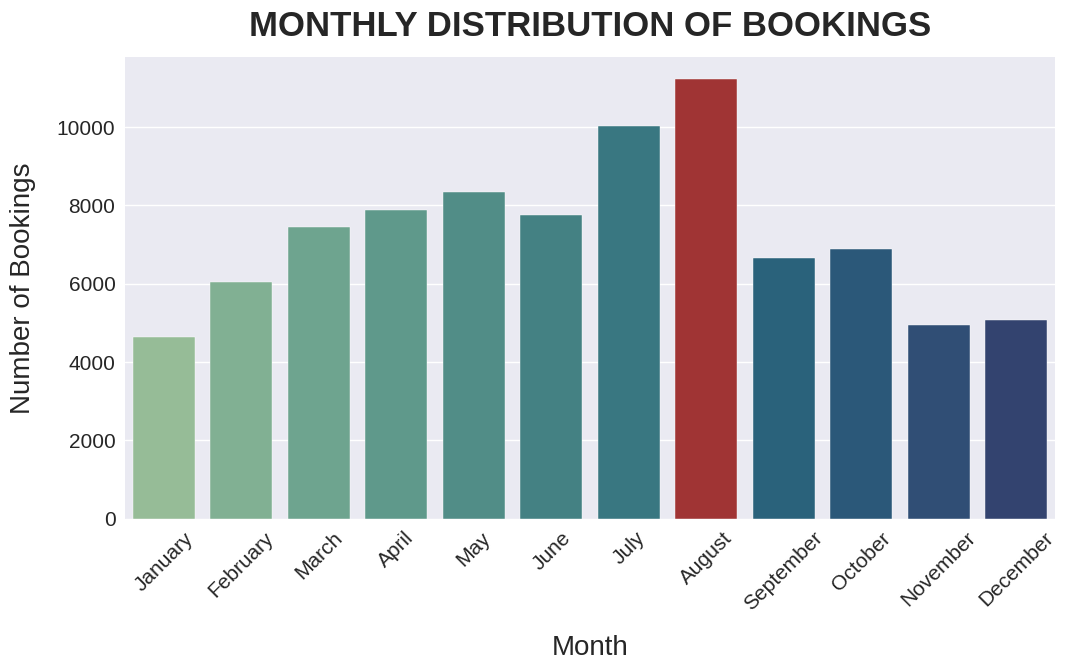

In [253]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)

# # Sort the DataFrame by the 'arrival_date_month' column
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month', key=lambda x: pd.to_datetime(x, format='%B'))

# Reset the index of the DataFrame starting from 1
bookings_by_months_df = bookings_by_months_df.reset_index(drop=True)

# Plotting the bar plot
plt.figure(figsize=(12, 6))

# Assign a color palette
colors = sns.color_palette('crest', len(bookings_by_months_df))

# Find the index of the highest count
max_count_index = bookings_by_months_df['Counts'].idxmax()


# Set the color for the highest bar
colors[max_count_index] = 'firebrick'

sns.barplot(x='arrival_date_month', y='Counts', data=bookings_by_months_df, palette=colors)

plt.title("MONTHLY DISTRIBUTION OF BOOKINGS", pad=15)
plt.xlabel('Month', labelpad=15)
plt.ylabel('Number of Bookings', labelpad=15)

plt.xticks(rotation=45);  # Rotate x-axis labels for better readability


##### 1. Why did I pick the specific chart?

I opted for a bar chart because it is a versatile chart type that allows for easy comparison between different categories or groups. I had data where I needed to compare values across different categories, and the bar chart was an ideal choice for this purpose. The rectangular bars in the chart enabled me to represent each category's value accurately, and the reader could easily interpret the differences in values between categories.

##### 2. What is/are the insight(s) found from the chart?

The monthly distribution of hotel bookings provides the following insights:

- Seasonal Variation: The data reveals that the number of bookings varies across different months. There are certain months, such as July and August, which have a higher number of bookings compared to other months. This suggests a peak season for hotel bookings, likely due to factors such as summer vacations or holidays. On the other hand, months like January and November have relatively lower booking counts, indicating potential off-peak or low-demand periods.

- Demand Fluctuation: The booking counts fluctuate throughout the year, with some months experiencing higher demand than others. For example, July and August have the highest booking counts, indicating high demand during the summer season. Conversely, months like January and November have lower booking counts, suggesting lower demand during these periods. Understanding these fluctuations in demand can help businesses allocate resources effectively, adjust pricing strategies, and plan marketing campaigns to maximize revenue during peak seasons and optimize operations during off-peak periods.

- Potential Opportunities: The data highlights potential opportunities for targeted marketing and promotional activities. For instance, months with lower booking counts, such as January and November, could be targeted for special offers or discounts to attract more customers during these quieter periods. Additionally, months with higher booking counts, such as July and August, could be leveraged to promote premium services or additional amenities to capture the demand and maximize revenue.

These insights can guide businesses in their revenue management strategies, staffing decisions, and marketing efforts to optimize performance throughout the year.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the monthly distribution of hotel bookings can help create a positive business impact. Understanding the seasonal variation and demand fluctuation allows businesses to optimize their operations and implement effective revenue management strategies. By aligning resources, pricing, and marketing efforts with the peaks and valleys of booking counts, businesses can maximize revenue and customer satisfaction.

However, it's important to consider potential challenges that could lead to negative growth:

- Off-Peak Periods: Months with lower booking counts, such as January and November, may pose challenges in terms of revenue generation. During these off-peak periods, businesses might experience lower demand and potential revenue loss. To mitigate this, businesses can focus on targeted marketing, promotional offers, or partnerships to attract customers during these quieter periods.

- Competition: The insights from the monthly distribution provide information about the industry's demand patterns. Competitors might also be aware of these trends and adjust their strategies accordingly. If competitors successfully capture a larger market share during peak seasons or implement more effective marketing campaigns, it could negatively impact a business's growth. To counter this, businesses should continuously monitor the market, differentiate their offerings, and adapt marketing strategies to stay competitive.

Overall, the gained insights provide opportunities for businesses to capitalize on peak seasons, optimize operations, and tailor marketing efforts. By addressing challenges during off-peak periods and staying competitive, businesses can mitigate negative growth risks and strive for positive business impact.



#### 10) What is the most preferred meal type?

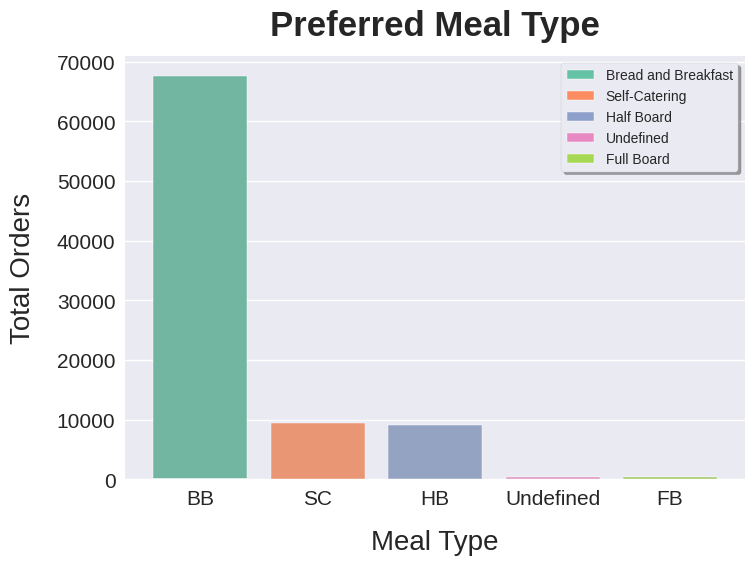

In [254]:
# Calculate the counts of each meal type
meal_counts = df['meal'].value_counts()


# Creat a color list to match with legends
colors = sns.color_palette("Set2", n_colors=5)

# Create a bar plot of the meal counts
sns.barplot(x=meal_counts.index, y=meal_counts.values, order=meal_counts.index, palette = colors)

# Set the x-axis label with a pad length of 15
plt.xlabel('Meal Type', labelpad=15)

# Set the y-axis label with a pad length of 15
plt.ylabel('Total Orders', labelpad=15)

# Create a custom legend
legend_labels = ['Bread and Breakfast', 'Self-Catering', 'Half Board', 'Undefined', 'Full Board']
top_colors = sns.color_palette("Set2", n_colors=5)
legend_handles = [plt.bar(0, 0, color=top_colors[0]), plt.bar(0, 0, color=top_colors[1]),
                  plt.bar(0, 0, color=top_colors[2]), plt.bar(0, 0, color=top_colors[3]),
                  plt.bar(0, 0, color=top_colors[4])]
plt.legend(legend_handles, legend_labels, frameon = True, shadow = True, fontsize = 10)

# Set the title of the bar plot with a pad length of 15
plt.title("Preferred Meal Type", pad=15);

##### 1. Why did I pick the specific chart?

I opted for a bar chart because it is a versatile chart type that allows for easy comparison between different categories or groups. I had data where I needed to compare values across different categories, and the bar chart was an ideal choice for this purpose. The rectangular bars in the chart enabled me to represent each category's value accurately, and the reader could easily interpret the differences in values between categories.

##### 2. What is/are the insight(s) found from the chart?

Clearly, the most preferred meal type is Bread and Breakfast

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the most preferred meal type is Bread and Breakfast, the gained insights can potentially help create a positive business impact. Understanding the customers' preference for this meal type allows businesses to tailor their offerings and marketing strategies to meet customer demands. By focusing on providing high-quality Bread and Breakfast options, businesses can enhance the customer experience, improve customer satisfaction, and potentially attract more guests.

However, it's important to consider potential challenges that could lead to negative growth:

- Limited Variety: If Bread and Breakfast is the most preferred meal type and the business solely focuses on this option, it may limit the variety of meal choices available to customers. This could lead to a potential decrease in customer satisfaction and limited appeal to customers seeking different meal options. To mitigate this, businesses can consider offering a diverse range of meal choices, including options for lunch, dinner, and snacks, to cater to a wider customer base.

- Competitor Differentiation: While Bread and Breakfast may be the preferred meal type, it's important to assess competitors' offerings in the market. If competitors offer similar or superior Bread and Breakfast options, it could negatively impact the business's ability to stand out and attract customers. To maintain a competitive edge, businesses should continuously monitor the market, innovate their meal offerings, and differentiate themselves by providing unique and exceptional experiences.

Overall, the gained insights regarding the preference for Bread and Breakfast provide an opportunity for businesses to tailor their offerings and enhance customer satisfaction. However, businesses should also ensure they offer a variety of meal choices to cater to different preferences and continuously differentiate themselves


#### 11) What percent of bookings came from different Distribution Channels?

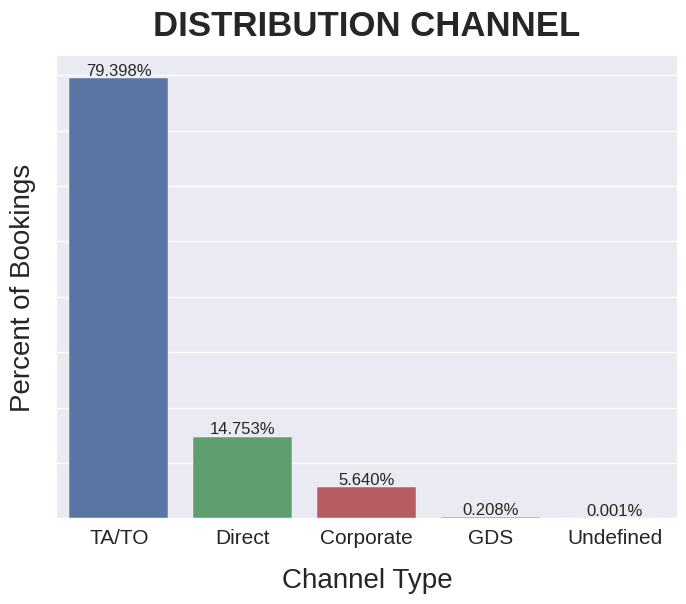

In [255]:
# Calculate the percentage of each category
channel_counts = df['distribution_channel'].value_counts(normalize=True) * 100

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values)

# Add the percentage values on top of each bar
for i, value in enumerate(channel_counts.values):
    plt.text(i, value, f'{value:.3f}%', ha='center', va='bottom', fontsize =12)

# Remove y-axis ticks
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Set the plot title and x-axis label
plt.title('DISTRIBUTION CHANNEL', pad=15)
plt.xlabel('Channel Type', labelpad=15)
plt.ylabel('Percent of Bookings', labelpad=15)


# Display the plot
plt.show()


##### 1. Why did I pick the specific chart?

I opted for a bar chart because it is a versatile chart type that allows for easy comparison between different categories or groups. I had data where I needed to compare values across different categories, and the bar chart was an ideal choice for this purpose. The rectangular bars in the chart enabled me to represent each category's value accurately, and the reader could easily interpret the differences in values between categories.

##### 2. What is/are the insight(s) found from the chart?

The percentage distribution of bookings from different distribution channels provides the following insights:

- Dominant Distribution Channel: The data shows that the TA/TO (Travel Agent/ Tour Operator) channel has the highest percentage of bookings at 79.4%. This indicates a significant reliance on travel agents or tour operators for generating bookings. It suggests that partnerships and collaborations with these entities play a crucial role in driving business and attracting customers.

- Direct Bookings: Direct bookings account for 14.8% of the total bookings. This represents customers who book directly through the hotel's own channels, such as the hotel website or call center. The relatively high percentage of direct bookings indicates a level of customer engagement and loyalty towards the hotel brand. It suggests that the hotel's marketing efforts and brand positioning have been successful in attracting a portion of customers to book directly.

- Corporate Bookings: The corporate channel accounts for 5.6% of the total bookings. This segment represents bookings made by corporate clients or through corporate partnerships. The presence of corporate bookings indicates a focus on attracting business travelers and establishing corporate relationships to drive bookings. It signifies the hotel's efforts to cater to the specific needs and preferences of corporate clients.

- GDS and Undefined: The GDS (Global Distribution System) channel accounts for 0.2% of the bookings, while the undefined category represents a negligible percentage. These channels may include bookings made through global distribution systems or other unidentified sources. While their contribution is relatively small, it's important to assess their potential impact and explore ways to optimize these channels if they align with the business goals.

These insights can guide businesses in understanding the distribution channels that have the highest impact and in developing strategies to optimize partnerships, enhance direct bookings, and attract corporate clients to drive positive business growth.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Will the gained insights help create a positive business impact?

The gained insights regarding the percentage distribution of bookings from different distribution channels can potentially create a positive business impact. Understanding the dominant channels and their contribution allows businesses to focus their efforts and resources accordingly. By strengthening partnerships with travel agents and tour operators (TA/TO), optimizing direct booking channels, and catering to the needs of corporate clients, businesses can enhance their market presence, increase bookings, and potentially drive positive growth.

Are there any insights that lead to negative growth? Justify with specific reasons.

While there are no specific insights that directly lead to negative growth, it's important to consider potential challenges:

- Overreliance on a Single Channel: The dominance of the TA/TO channel (79.4%) highlights a potential risk of overreliance on external agents for bookings. This could make the business more susceptible to fluctuations in the travel agent industry or changes in their business practices. To mitigate this, businesses should focus on diversifying their distribution channels and attracting more direct bookings to reduce dependency on a single channel.

- Limited Control over Distribution: Relying heavily on external distribution channels may limit the business's control over pricing, availability, and customer interactions. This can hinder the ability to customize offerings and provide personalized experiences. Businesses should explore strategies to strengthen their direct booking channels and invest in technology and marketing efforts to drive more direct bookings, allowing for better control over the customer journey.

Overall, the gained insights provide opportunities for businesses to optimize their distribution strategies, strengthen partnerships, and attract direct bookings. While the dominance of the TA/TO channel presents potential risks, diversifying distribution channels and increasing direct bookings can help mitigate negative growth risks and drive positive business impact.



#### 12) What types of rooms are preferred by the customers?

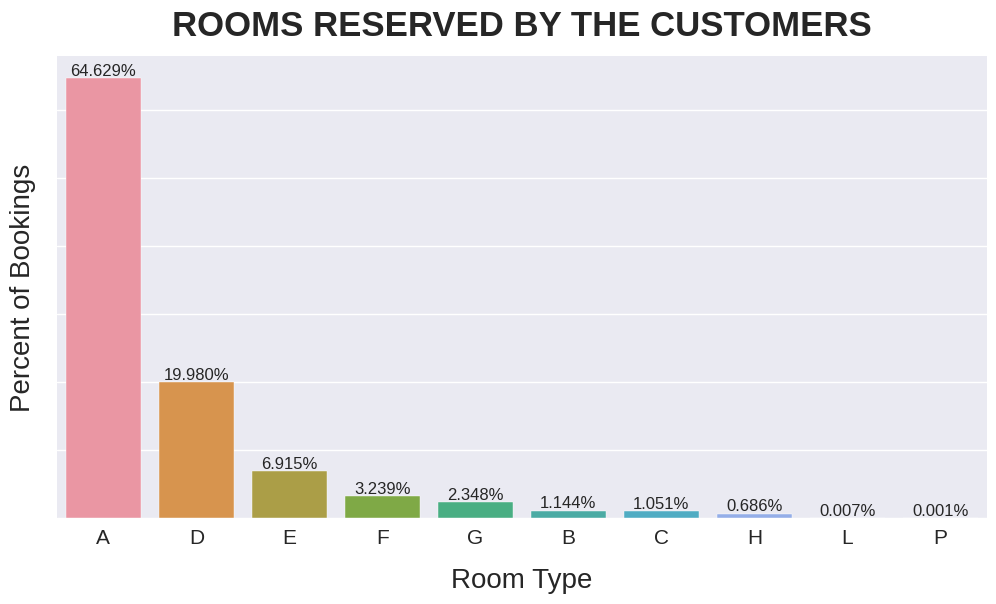

In [256]:
# Calculate the percentage of each category
channel_counts = df['reserved_room_type'].value_counts(normalize=True) * 100

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values)

# Add the percentage values on top of each bar
for i, value in enumerate(channel_counts.values):
    plt.text(i, value, f'{value:.3f}%', ha='center', va='bottom', fontsize =12)

# Remove y-axis ticks
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Set the plot title and x-axis label
plt.title('ROOMS RESERVED BY THE CUSTOMERS', pad=15)
plt.xlabel('Room Type', labelpad=15)
plt.ylabel('Percent of Bookings', labelpad=15);


##### 1. Why did I pick the specific chart?

I opted for a bar chart because it is a versatile chart type that allows for easy comparison between different categories or groups. I had data where I needed to compare values across different categories, and the bar chart was an ideal choice for this purpose. The rectangular bars in the chart enabled me to represent each category's value accurately, and the reader could easily interpret the differences in values between categories.

##### 2. What is/are the insight(s) found from the chart?

Most customers (64.630%) reserved Type 'A' for their accomodation and 90 percent of the total bookings preferred, Room type 'A', 'D'and 'E'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Will the gained insights help create a positive business impact?

The gained insights regarding the preferences for accommodation types can potentially create a positive business impact. Understanding the most preferred accommodation type (Type 'A') and the percentage of bookings that include Types 'A', 'D', and 'E' allows businesses to align their offerings and marketing strategies accordingly. By focusing on promoting and enhancing the preferred accommodation types, businesses can cater to customer preferences, increase bookings, and potentially drive positive growth.

Are there any insights that lead to negative growth? Justify with specific reasons.

While there are no specific insights that directly lead to negative growth, it's important to consider potential challenges:

- Limited Variety: If a significant majority of customers (64.630%) are reserving Type 'A' for their accommodation, it may indicate a potential lack of diversity in the available accommodation options. This could result in limited appeal to customers seeking different types of accommodations. To mitigate this, businesses should consider expanding and diversifying their accommodation offerings to cater to a wider range of customer preferences.

- Market Shifts: While the majority of bookings (90%) prefer Types 'A', 'D', and 'E', it's crucial to monitor market trends and customer preferences over time. Preferences and trends can change, and customers may start seeking different types of accommodations. To stay competitive, businesses should continuously analyze customer feedback, market research, and emerging trends to adapt their offerings and align with evolving customer demands.

Overall, the gained insights provide opportunities for businesses to focus on the preferred accommodation types and tailor their offerings accordingly. However, it's essential to ensure a diverse range of accommodations and remain adaptable to changing market dynamics to avoid potential negative growth risks and meet evolving customer preferences.



#### 13) What is the distribution/characteristic of ADR values?

5 Number summary:
min      0.00
25%     72.25
50%     98.40
75%    134.10
max    510.00
Name: adr, dtype: float64


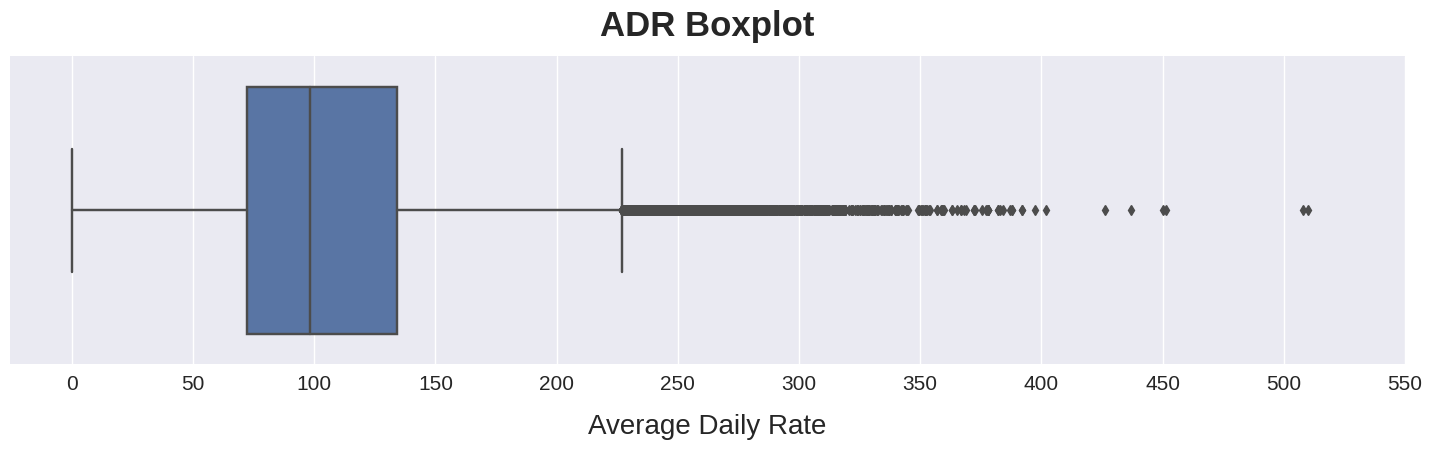

In [257]:
plt.figure(figsize = (18,4))

# # Handling Outliers

# # Calculate the first quartile (Q1) and third quartile (Q3)
# Q1 = df['adr'].quantile(0.25)
# Q3 = df['adr'].quantile(0.75)
# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1
# # Define the lower and upper bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# # Create a new DataFrame without outliers
# df_no_adr_outliers = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]

# Create a horizontal boxplot using Seaborn
sns.boxplot(data=df, x = 'adr', )

# Adding plt.xticks()
plt.xticks(np.arange(0,600,50))
# Add labels and title to the plot
plt.xlabel('Average Daily Rate', labelpad = 15)  # Add a label to the x-axis
plt.title('ADR Boxplot', pad = 15);  # Add a title to the plot

five_number_summary = df['adr'].describe().loc[['min', '25%', '50%', '75%', 'max']]

# Print the summary
print(f'5 Number summary:\n{five_number_summary}')

##### 1. Why did I pick the specific chart?

Firstly, a boxplot is a useful visualization technique for summarizing the distribution of numerical data. It provides a clear representation of key summary statistics such as the median, quartiles, and potential outliers. This allows for a quick understanding of the central tendency, spread, and skewness of the 'adr' values.

Additionally, a boxplot enables easy comparison of the 'adr' values across different categories or groups. By utilizing the 'hotel' column as the hue in the boxplot, I can visually assess any differences in the average daily rate between different hotels. This comparison can provide insights into potential variations in pricing strategies or customer preferences among the hotels.

Moreover, a boxplot allows for the identification of outliers, which are values that significantly deviate from the majority of the data. Outliers in the 'adr' column might indicate unusual or extreme average daily rates that are worth investigating further.

Overall, a boxplot is a concise and informative visualization that helps me gain insights into the distribution, central tendency, and variability of the 'adr' column. It also facilitates the comparison of 'adr' values between different hotels.

##### 2. What is/are the insight(s) found from the chart?

The 5-number summary of the 'adr' column provides insights into the distribution and characteristics of the average daily rate values. Here are the key findings:

- Minimum: The minimum 'adr' value is 0.00. This suggests that there are instances where the average daily rate is set to zero or near zero, indicating the possibility of special pricing, promotional rates, or data entry errors.

- 25th Percentile (Q1): The 25th percentile 'adr' value is 72.25. This means that 25% of the 'adr' values are below this threshold, indicating a relatively lower average daily rate for a significant portion of the data.

- Median (50th Percentile, Q2): The median 'adr' value is 98.40. This represents the middle value of the distribution, with 50% of the 'adr' values falling below this point. The median provides an estimate of the central tendency or typical value of the 'adr' column.

- 75th Percentile (Q3): The 75th percentile 'adr' value is 134.10. This indicates that 75% of the 'adr' values are below this threshold. It suggests a higher average daily rate for a significant portion of the data.

- Maximum: The maximum 'adr' value is 510.00. This represents the highest recorded average daily rate in the dataset. It indicates the presence of outliers or extreme values that significantly deviate from the majority of the 'adr' values.

The 5-number summary provides insights into the spread, central tendency, and extreme values of the 'adr' column, helping to understand the pricing patterns and distribution of average daily rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: The 25th percentile ('adr' value of 72.25) and the median ('adr' value of 98.40) indicate that a significant portion of the 'adr' values is relatively lower. This could suggest that there are opportunities to attract price-conscious customers or capture market share by offering competitive pricing. Lower average daily rates might be appealing to budget-conscious travelers, leading to increased customer interest and potential growth in occupancy rates.

Negative Business Impact: The presence of a minimum 'adr' value of 0.00 raises concerns. It could suggest data entry errors, promotional rates, or special pricing scenarios that might adversely impact revenue generation. Setting average daily rates to zero or near-zero can lead to revenue loss and have a negative impact on the business's profitability.

Extreme Values: The maximum 'adr' value of 510.00 indicates the presence of outliers, representing significantly higher average daily rates compared to the majority of values. While outliers might not necessarily have a direct negative impact, they could indicate pricing strategies that might limit customer demand or deter potential bookings. Extremely high average daily rates could potentially hinder customer acquisition and retention, leading to a negative growth impact if not managed effectively.

Ultimately, the business impact will depend on the specific strategies, market dynamics, and customer preferences. It is important to conduct further analysis, considering factors such as market competition, customer segmentation, and demand elasticity, to evaluate the potential positive or negative implications of the observed insights. Additionally, ongoing monitoring, analysis, and adjustments in pricing strategies can help maximize positive impacts and mitigate negative impacts for sustainable business growth.

### **Bivariate Analysis**

#### 14) What is the yearly distribution of Bookings in different types of hotels?

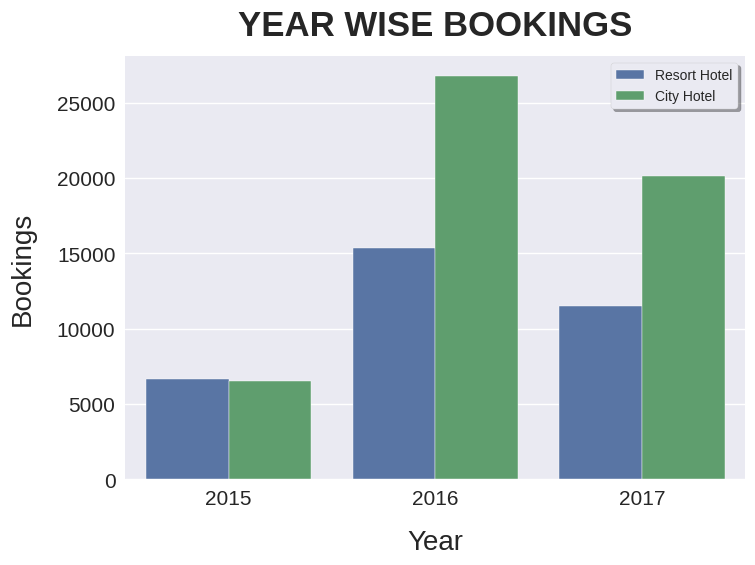

In [258]:
# Create a count plot
sns.countplot(x=df['arrival_date_year'], hue=df['hotel'])

# Add Titles and labels
plt.title("YEAR WISE BOOKINGS", pad=15)
plt.xlabel('Year', labelpad=15)
plt.ylabel('Bookings', labelpad=15)

# Customize the legend
plt.legend(title = False, frameon = True, fontsize = 10, shadow = True);

##### 1. Why did I pick the specific chart?

I opted for a bar chart because it is a versatile chart type that allows for easy comparison between different categories or groups. I had data where I needed to compare values across different categories, and the bar chart was an ideal choice for this purpose. The rectangular bars in the chart enabled me to represent each category's value accurately, and the reader could easily interpret the differences in values between categories.

##### 2. What is/are the insight(s) found from the chart?

City Hotels are preferred in 2016 and 2017. Overall bookings were highest in the year 2016

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

n/a

#### 15) What is the ADR distribution in different types of hotels?

              min   25%    50%    75%    max
hotel                                       
City Hotel    0.0  84.0  105.3  134.0  510.0
Resort Hotel  0.0  52.2   80.0  135.0  508.0


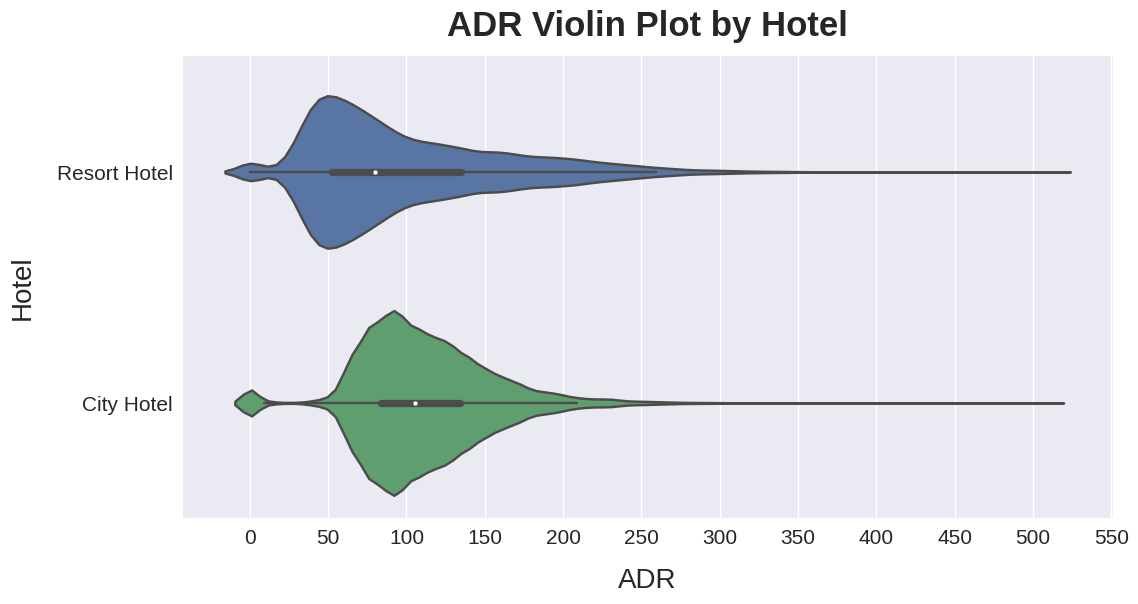

In [259]:
plt.figure(figsize=(12, 6))
# Create a violin plot of 'adr' with 'hotel' as the hue
sns.violinplot(data=df, y='hotel', x='adr')

# Add labels and title to the plot
plt.xlabel('ADR', labelpad=15)
plt.ylabel('Hotel', labelpad=15)
plt.title('ADR Violin Plot by Hotel', pad=15)

# Adding custom x-ticks in the plot
plt.xticks(np.arange(0,600,50));

# Analysing 5 number summary of ADR column when grouped by Hotel Type

# Group the DataFrame by 'hotel' and calculate the 5-number summary for 'adr'
summary = df.groupby('hotel')['adr'].describe()[['min', '25%', '50%', '75%', 'max']]

# Print the summary
print(summary)

##### 1. Why did I pick the specific chart?

A violin plot was chosen to compare the 'adr' column with 'hotel' as the hue. It effectively shows the distribution of 'adr' values across different hotels. The width of the violins represents data density, and the central line indicates the median. It allows for easy comparison, identifying differences in spread and shape. This helps understand pricing patterns and differences between hotels.

##### 2. What is/are the insight(s) found from the chart?

Minimum Values: The minimum 'adr' value for both "City Hotel" and "Resort Hotel" is 0.0, indicating instances where the average daily rate is zero or near-zero.

Quartiles: The 25th percentile (Q1) for "City Hotel" is 84.0, while for "Resort Hotel" it is 52.2. This suggests that a higher proportion of the 'adr' values for "City Hotel" is above 84.0 compared to "Resort Hotel", where a higher proportion is below 52.2.

Median: The median (50th percentile) for "City Hotel" is 105.3, while for "Resort Hotel" it is 80.0. This indicates that the central tendency of the 'adr' values is higher for "City Hotel" compared to "Resort Hotel".

Quartiles (75th Percentile): The 75th percentile (Q3) for "City Hotel" is 134.0, while for "Resort Hotel" it is 135.0. This suggests that the upper range of 'adr' values is similar between the two hotel types.

Maximum Values: The maximum 'adr' value for "City Hotel" is 510.0, while for "Resort Hotel" it is 508.0. These values indicate the highest recorded average daily rates within each hotel category and are relatively close to each other.

By comparing the values between "City Hotel" and "Resort Hotel" in the table, we can observe differences in the quartiles and median, suggesting potential variations in the distribution and central tendency of the 'adr' values between the two hotel types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

The existence of quartiles and median values suggests a range of average daily rates that customers are willing to pay. Understanding this distribution can help businesses optimize their pricing strategies, identify competitive rates, and attract customers within their target market.
The presence of lower quartiles and median values indicates the potential to attract price-sensitive customers. By offering competitive rates within these ranges, businesses can increase customer interest and potentially boost occupancy rates, leading to positive business growth.

Negative Business Impact:

The minimum 'adr' values of 0.0 for both "City Hotel" and "Resort Hotel" can be a cause for concern. It may indicate data entry errors or unrealistic pricing, potentially resulting in revenue loss. Pricing average daily rates at zero or near-zero levels can negatively impact business profitability and hinder growth.
Overall, while the insights gained from the 5-number summary can offer opportunities for positive business impact, the presence of minimum values at zero or near-zero levels is a potential risk that could lead to negative growth. Businesses should review their pricing strategies, ensure data accuracy, and consider the potential consequences of extremely low rates to make informed decisions that foster positive business growth.

#### 16) What is the average weekly trend of ADR throughout a year?

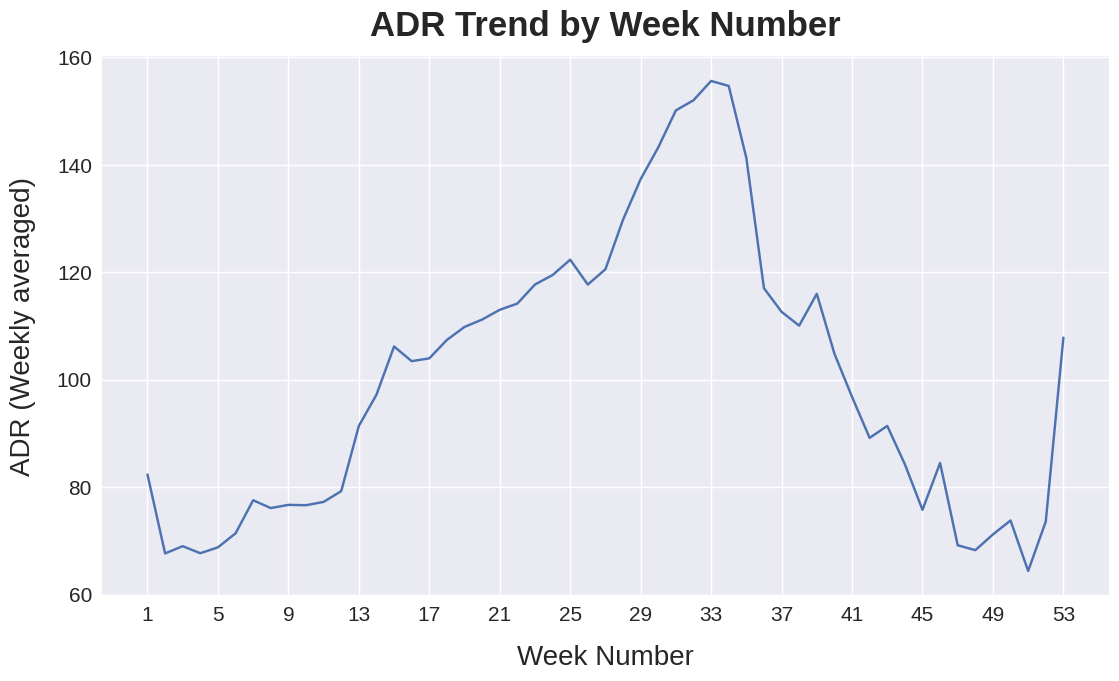

In [260]:
plt.figure(figsize=(13, 7))

# Group the DataFrame by 'arrival_date_week_number' and calculate the mean of 'adr' within each week
grouped_df = df.groupby('arrival_date_week_number')['adr'].mean()

# Create a line plot of 'adr' against 'arrival_date_week_number'
plt.plot(grouped_df.index, grouped_df.values)

# Add labels and title to the plot
plt.xlabel('Week Number', labelpad=15)
plt.ylabel('ADR (Weekly averaged)', labelpad=15)
plt.title('ADR Trend by Week Number', pad=15)

# Set x-axis ticks every 4 weeks
plt.xticks(np.arange(1, 55, 4));


##### 1. Why did you pick the specific chart?

 I chose a line plot to showcase the average weekly ADR (Average Daily Rate) on the y-axis and the week number on the x-axis for a few reasons. Firstly, a line plot is effective in displaying trends over time. By plotting the ADR values against the week numbers, we can easily visualize any changes, fluctuations, or patterns in ADR over the weeks. Secondly, the line plot allows for a clear representation of the overall trend and helps identify any peaks or dips in ADR. It enables us to analyze the data in a continuous manner, providing a comprehensive view of the ADR trend throughout the weeks. Finally, the line plot facilitates the comparison of ADR values between different weeks and helps understand the overall direction of ADR changes.

##### 2. What is/are the insight(s) found from the chart?

Seasonality and Trends: Analyzing the ADR values over time reveals interesting patterns. Week 33 stands out as having the highest ADR value, indicating a potential peak period or a significant event that drove prices higher during that specific week. Exploring the reasons behind this spike can provide insights into demand drivers and opportunities for revenue maximization during similar periods.

Seasonal Patterns: Identifying seasonal patterns in ADR can help optimize pricing strategies. For instance, weeks 13 to 16 show consistently higher ADR values, possibly indicating a high-demand season or specific holidays. Understanding and leveraging these seasonal patterns can guide revenue management decisions, such as implementing dynamic pricing strategies during peak periods.

Comparative Analysis: Comparing ADR values across different weeks can reveal valuable information about pricing differentials and demand fluctuations. Analyzing ADR trends during both high-ADR weeks (e.g., week 33) and low-ADR weeks (e.g., week 46) can help identify pricing strategies and demand drivers for different periods, guiding revenue optimization efforts.

Long-Term Trend Analysis: The general trend of increasing ADR from the beginning of the year until around week 19, followed by fluctuations and a decrease towards the end of the year, should be further explored. Understanding the factors contributing to these trends can inform revenue management decisions and help forecast future ADR patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### 17) What is the average daily trend of ADR throughout a month?

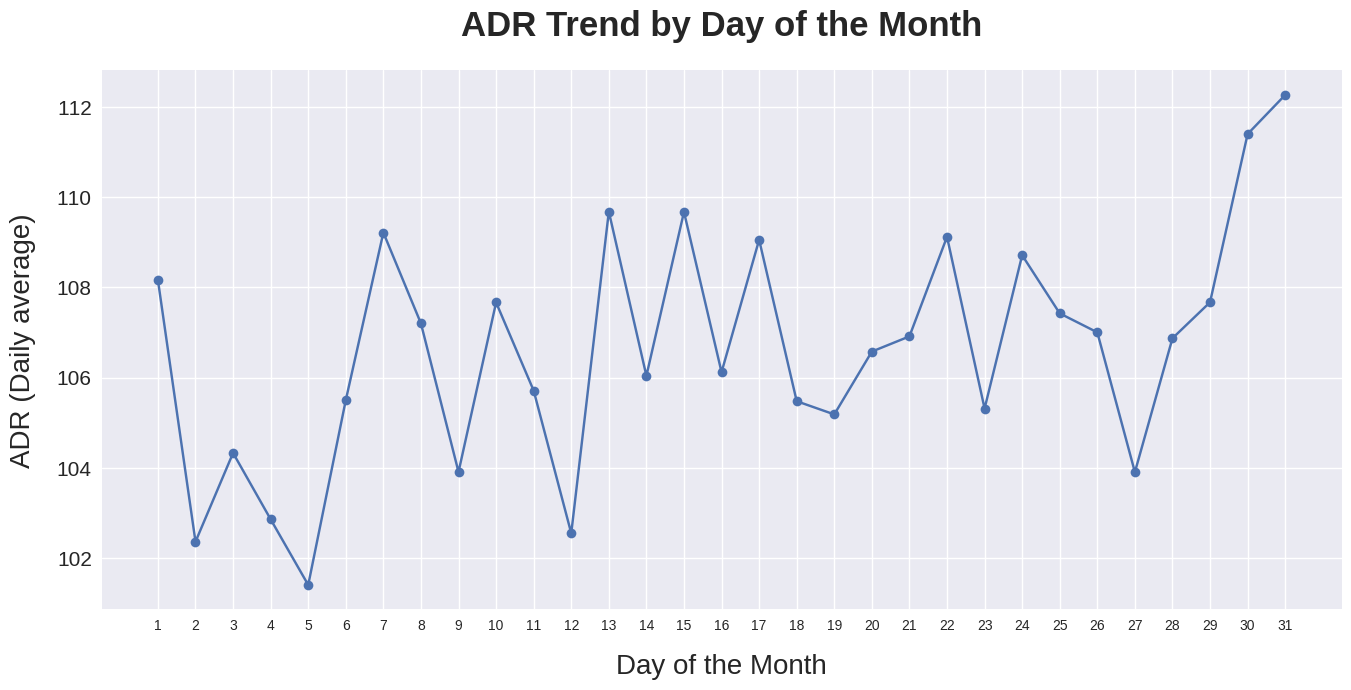

In [261]:
plt.figure(figsize=(16, 7))

# Group the DataFrame by 'arrival_date_week_day_of_month' and calculate the mean of 'adr' within each week
grouped_df = df.groupby('arrival_date_day_of_month')['adr'].mean()

# Create a line plot of 'adr' against 'arrival_date_week_number'
plt.plot(grouped_df.index, grouped_df.values, '-o')

# Add labels and title to the plot
plt.xlabel('Day of the Month', labelpad=15)
plt.ylabel('ADR (Daily average)', labelpad=15)
plt.title('ADR Trend by Day of the Month', pad=25)

# Set x-axis ticks every 4 weeks
plt.xticks(np.arange(1, 32, 1), fontsize = 10);


##### 1. Why did I pick the specific chart?

 I chose a line plot to showcase the average weekly ADR (Average Daily Rate) on the y-axis and the week number on the x-axis for a few reasons. Firstly, a line plot is effective in displaying trends over time. By plotting the ADR values against the week numbers, we can easily visualize any changes, fluctuations, or patterns in ADR over the weeks. Secondly, the line plot allows for a clear representation of the overall trend and helps identify any peaks or dips in ADR. It enables us to analyze the data in a continuous manner, providing a comprehensive view of the ADR trend throughout the weeks. Finally, the line plot facilitates the comparison of ADR values between different weeks and helps understand the overall direction of ADR changes.

##### 2. What is/are the insight(s) found from the chart?

- ADR value drops at the starting of the month,and rises at the end of the month, other than this there is no visible trend.
- ADR value fluctuates variably in the range of 100 and 112

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact for the hotel industry.

- Impact on Pricing Strategy: Understanding the ADR drop at the start of the month and rise at the end can influence pricing strategies. Offering attractive discounts or promotions during the beginning of the month may attract more guests, while increasing rates towards the end of the month during peak demand can lead to higher revenue.

- Stable ADR Fluctuations: The stable ADR fluctuations in the range of 100 and 112 allow hotels to set consistent pricing, which can instill trust among customers and maintain their loyalty.

There are no insights that inherently lead to negative growth. However, businesses should be cautious not to overprice or underprice rooms, striking a balance between offering competitive rates and maximizing profitability. Continuously monitoring customer feedback and market trends is essential to adapt strategies for positive business impact.

#### 18) Which Hotel type is more prone to cancellations?

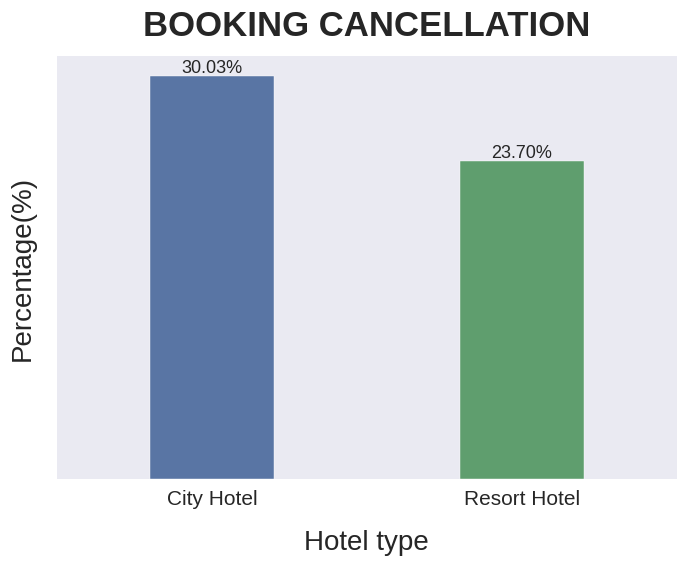

In [262]:
# Creating new DataFrame where bookings are cancelled
canceled_df = df[df['is_canceled'] == 1]

# Grouping by hotel
canceled_df = canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# Adding 'total booking' column for calculating the percentage
canceled_df['total_bookings'] = df.groupby('hotel').size().reset_index().rename(columns={0: "total_bookings"}).drop('hotel', axis=1)

# Plotting the bar chart
sns.barplot(x=canceled_df['hotel'], y=canceled_df['no_of_cancelled_bookings'] * 100 / canceled_df['total_bookings'], width = 0.4)

# Set labels
plt.xlabel('Hotel type', labelpad=15)
plt.ylabel('Percentage(%)', labelpad=15)
plt.title("BOOKING CANCELLATION", pad=15)

# Add percentage values on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2f") + "%", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom", fontsize = 13)

# Remove y-ticks
plt.yticks([]);

##### 1. Why did I pick the specific chart?

I opted for a bar chart because it is a versatile chart type that allows for easy comparison between different categories or groups. I had data where I needed to compare values across different categories, and the bar chart was an ideal choice for this purpose. The rectangular bars in the chart enabled me to represent each category's value accurately, and the reader could easily interpret the differences in values between categories.

##### 2. What is/are the insight(s) found from the chart?

City Hotels are more prone to Booking Cancellation than Resort Hotels. 30.03 percent of overall 'City' hotel bookings are cancelled while 23.70 percent of overall 'Resort' hotel bookings are cancelled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact for the hotel industry. Here's how:

Positive Business Impact:

Cancellation Management: The insight that City Hotels experience a higher cancellation rate (30.03%) compared to Resort Hotels (23.70%) highlights the importance of effective cancellation management strategies. Hotels can focus on implementing policies and incentives to encourage guests to commit to their bookings, reducing the overall cancellation rate. By minimizing cancellations, hotels can optimize room utilization, plan staff schedules more efficiently, and reduce potential revenue losses from last-minute cancellations.

Revenue Optimization: Understanding the difference in cancellation rates between City and Resort Hotels can also help in revenue optimization. Hotels can adjust their pricing and marketing strategies accordingly. For example, City Hotels might offer more flexible booking options or special deals for non-refundable bookings, whereas Resort Hotels may attract guests with attractive packages and cancellation policies that align with vacation planning.

Insights Leading to Negative Growth:

While the insights provided do not explicitly indicate negative growth, there are potential challenges that need to be addressed:

Customer Satisfaction: High cancellation rates can impact customer satisfaction, especially if guests face rigid cancellation policies or experience booking-related issues. It is essential for hotels to strike a balance between protecting their revenue and ensuring customer satisfaction. Negative experiences may lead to reduced customer loyalty, negative reviews, and potential loss of repeat business.

Revenue Impact: If City Hotels face consistently higher cancellation rates, it could lead to revenue fluctuations and unpredictability in business planning. Hotels may need to allocate additional resources for managing cancellations and develop strategies to mitigate revenue losses. Resort Hotels, on the other hand, could capitalize on their lower cancellation rates by attracting more guests seeking stable and reliable vacation plans.

In conclusion, the insights gained from analyzing the cancellation rates of City and Resort Hotels provide valuable information for hotel management to optimize their operations and revenue strategies. By focusing on effective cancellation management and understanding customer preferences, hotels can create a positive business impact and enhance the overall guest experience. However, it is crucial to address potential challenges, such as customer satisfaction and revenue fluctuations, to maintain sustainable growth and success in the competitive hospitality industry.







#### 19) Bookings are more on Weekdays or Weekends?

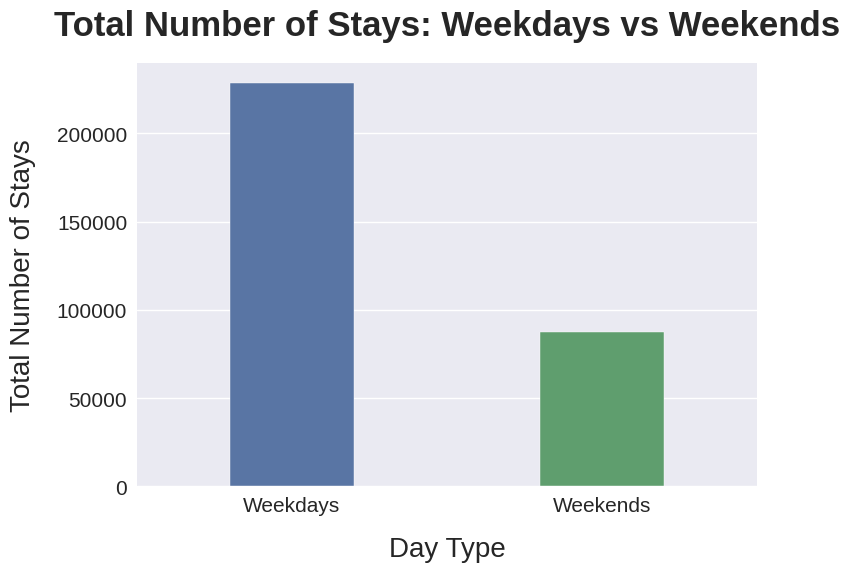

In [263]:
# Calculate the total number of stays in weekdays and weekend days
weekdays = df['stays_in_week_nights'].sum()
weekends = df['stays_in_weekend_nights'].sum()

# Create a bar plot using seaborn

sns.barplot(x=['Weekdays', 'Weekends'], y=[weekdays, weekends], width = 0.4)

# Set labels and title with padding
plt.xlabel('Day Type', labelpad=15)
plt.ylabel('Total Number of Stays', labelpad=15)
plt.title('Total Number of Stays: Weekdays vs Weekends', pad=20);

##### 1. Why did you pick the specific chart?

I opted for a bar chart because it is a versatile chart type that allows for easy comparison between different categories or groups. I had data where I needed to compare values across different categories, and the bar chart was an ideal choice for this purpose. The rectangular bars in the chart enabled me to represent each category's value accurately, and the reader could easily interpret the differences in values between categories.

##### 2. What is/are the insight(s) found from the chart?

Weekdays has total 228536 number of stays while weekends has total 87579 number of stays including both Resort and City Hotels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- Understanding the distribution of stays between weekdays and weekends allows hotel management to optimize their operations and resources. They can allocate staff, services, and amenities accordingly to meet the demands of different days. For example, if weekdays experience higher occupancy, hotels can focus on providing efficient business services and amenities for corporate guests. On weekends, they can enhance leisure offerings to cater to the needs of leisure travelers, potentially leading to increased guest satisfaction and repeat bookings.

Negative Impact:

- While the insight does not directly lead to negative growth, it is important to consider the potential impact on revenue and occupancy rates. If the majority of stays are concentrated on weekdays, it may lead to underutilization of resources on weekends, resulting in lower revenue generation. Hotels might face challenges in achieving optimal occupancy levels and revenue maximization during weekends. To mitigate this, strategies such as targeted marketing campaigns, promotions, and special packages can be implemented to attract more guests and increase weekend occupancy.

Overall, the insights gained regarding the distribution of stays between weekdays and weekends provide valuable information for resource allocation and business planning. By effectively utilizing resources, developing tailored services, and implementing marketing strategies, hotels can optimize revenue generation and enhance the overall guest experience, contributing to a positive business impact.

#### 20) What is the trend of Reservation status with increase in number of Booking changes?

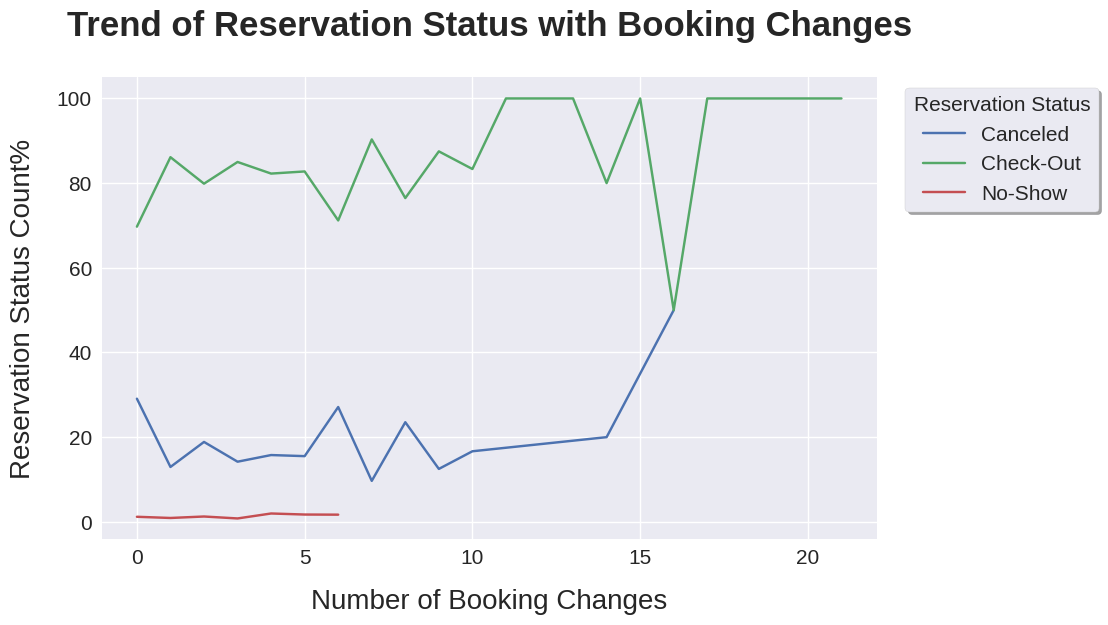

In [264]:
# Calculate the percent reservation status count for each number of booking changes
percent_status_count = df.groupby(['booking_changes', 'reservation_status']).size().reset_index(name='count')
total_status_count = percent_status_count.groupby(['booking_changes'])['count'].sum().reset_index(name='total_count')
percent_status_count = percent_status_count.merge(total_status_count, on='booking_changes')
percent_status_count['average'] = percent_status_count['count'] / percent_status_count['total_count']*100


# Create the seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='booking_changes', y='average', hue='reservation_status', data=percent_status_count)
plt.title('Trend of Reservation Status with Booking Changes', pad = 30)
plt.xlabel('Number of Booking Changes', labelpad = 15)
plt.ylabel('Reservation Status Count%', labelpad = 15)
plt.legend(title='Reservation Status', loc='upper right', bbox_to_anchor=(1.3, 1), frameon = True, shadow = True);

##### 1. Why did you pick the specific chart?

The line plot was chosen to display how reservation status changes with increasing booking changes due to the continuous nature of the data. It effectively shows trends and patterns over a continuous range, with lines connecting data points indicating direction and slope. Different colors for each reservation status category enable easy comparison. The plot reveals insights into the relationship between booking changes and reservation status, helping identify potential correlations. However, the choice of visualization always depends on the specific context, data characteristics, and research questions to ensure the most appropriate representation of the data.

##### 2. What is/are the insight(s) found from the chart?

- With incrase in the number of booking changes, The Percentage of Check-outs have increased which means, customers who are more likely to stay if they are interested and engaging with the bookings
- Reservations having No-Show status has made the least amount of Booking changes
- After 15 number of changes in the bookings, the cutomers are more likely to Check-out

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Will the gained insights help creating a positive business impact?

Yes, the gained insights can potentially help create a positive business impact. Understanding the relationship between the number of booking changes and reservation status allows businesses in the hospitality or travel industry to make informed decisions to enhance customer satisfaction and optimize operations.

Increased Check-outs with Booking Changes: The finding that the percentage of check-outs increases with an increase in booking changes suggests that customers who are actively engaging with their bookings are more likely to stay. This insight could help businesses focus on providing personalized and flexible booking options, which may lead to higher customer satisfaction, repeat bookings, and positive word-of-mouth.

No-Show Reservations and Booking Changes: The observation that reservations with the "No-Show" status have made the least amount of booking changes could indicate that these customers might be less engaged or committed to their bookings. To address this, businesses can implement strategies to minimize no-shows, such as sending timely reminders, offering incentives for early confirmations, or implementing more flexible cancellation policies.

After 15 Booking Changes: The insight that customers are more likely to check-out after 15 booking changes may indicate a point of diminishing returns in the booking modification process. Businesses can use this information to streamline their booking change policies and encourage customers to finalize their reservations before reaching the 15-change threshold.

Are there any insights that lead to negative growth? Justify with specific reason.

There are no specific insights mentioned that directly lead to negative growth. However, the data presented only provides a partial picture of the relationship between booking changes and reservation status. Further analysis and context are necessary to draw definitive conclusions and identify potential negative impacts.

For example, while increased check-outs with booking changes seem positive, it's essential to assess whether excessive booking changes might lead to customer dissatisfaction or operational challenges. Similarly, understanding why reservations with "No-Show" status made fewer changes could help identify any underlying issues that might negatively affect customer loyalty or revenue.

To ensure the insights result in a positive business impact, it is crucial to conduct a more comprehensive analysis, consider other relevant factors, and implement data-driven strategies tailored to the specific business context. Additionally, obtaining customer feedback and monitoring key performance metrics can help validate the impact of these insights on business growth and customer satisfaction.

#### 21) How Lead Time is related to Hotel Type?

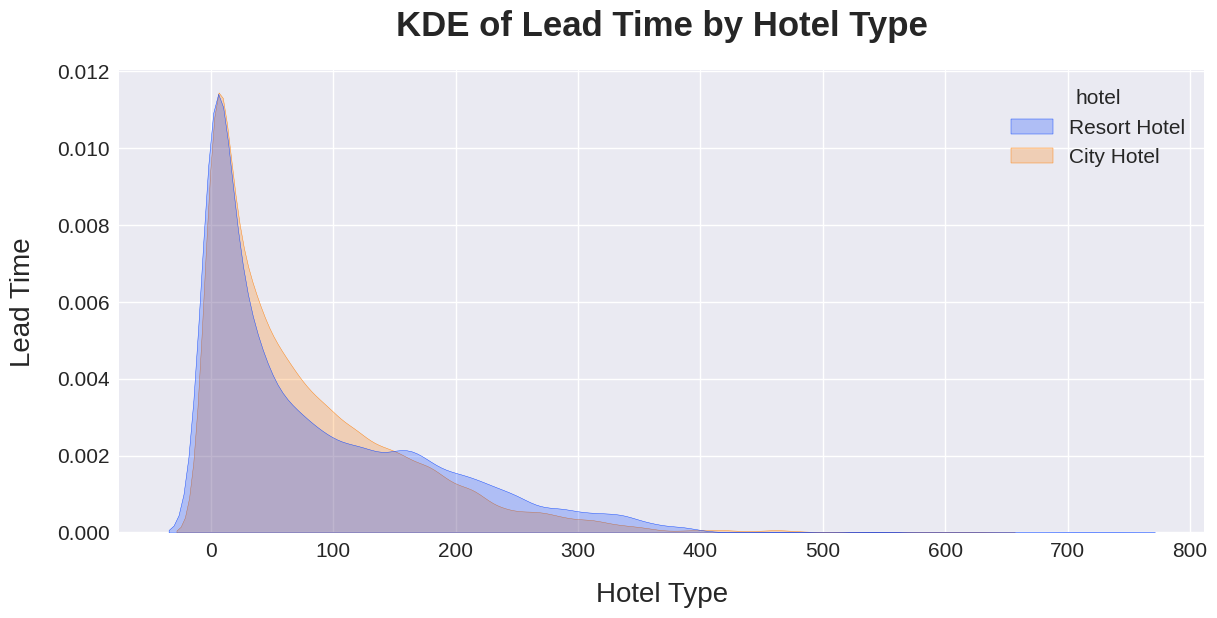

In [265]:
# Create a boxplot with 'lead_time' as x-axis, 'hotel_type' as hue
plt.figure(figsize=(14, 6))

sns.kdeplot(x='lead_time', hue='hotel', data=df, fill=True, common_norm=False, palette='bright')

# Add labels and title

# Add labels and title
plt.xlabel('Hotel Type', labelpad = 15)
plt.ylabel('Lead Time', labelpad = 15)
plt.title('KDE of Lead Time by Hotel Type', pad = 25);


##### 1. Why did you pick the specific chart?

I chose the KDE plot to represent hotel types on the x-axis and lead time on the y-axis because it provides a smooth and informative way to visualize the data's distribution. With the KDE plot, I can see the shape of the lead time distribution for each hotel type, helping me compare their patterns and identify any differences or similarities. It's a useful plot when dealing with continuous data like lead time, allowing me to understand the density of data points and spot trends easily.

##### 2. What is/are the insight(s) found from the chart?

- The trend of Lead Time is very similar for both Resort and City Hotel Types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that the trend of lead time is very similar for both Resort and City Hotel types may have mixed implications for business impact.

Positive Business Impact:

- Similar Lead Time Trend: The similarity in lead time trends suggests that both hotel types might attract a similar type of clientele. This understanding can be beneficial for marketing strategies, customer targeting, and resource allocation.
Streamlined Operations: As the lead time trend is similar, operations such as reservation management, staffing, and inventory control can be more streamlined, leading to better efficiency and cost savings.
Negative Growth:

- Lack of Differentiation: If the lead time trend is very similar, it might indicate a lack of differentiation between the two hotel types. This could result in challenges in standing out in a competitive market, impacting customer acquisition and loyalty.
Market Saturation: If both hotel types cater to the same audience, there might be saturation in the market for that specific customer segment, limiting growth opportunities.

To fully leverage the insights for positive business impact, hotels should focus on providing unique value propositions and enhancing guest experiences to differentiate themselves. Targeted marketing efforts, loyalty programs, and innovative offerings can help attract and retain customers, mitigating potential negative impacts. Continuous monitoring of market trends and customer feedback is essential to adapt strategies and maintain a competitive edge.

### **Multivariate Analysis**

**Divide the Dataset into Categorical Variables and Numerical Variables**

In [266]:
# Create a new DataFrame 'df_categorical' with specified columns
categorical_columns = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
                    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country',
                    'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
                    'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status']

numerical_columns = ['lead_time', 'stays_in_weekend_nights',
                    'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
                     'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr',
                     'required_car_parking_spaces', 'total_of_special_requests']
# Make separate datafreames
df_categorical = df[categorical_columns]
df_numerical = df[numerical_columns]

#### 22) What is the weekly trend of ADR of different Hotel Types throughout a year?

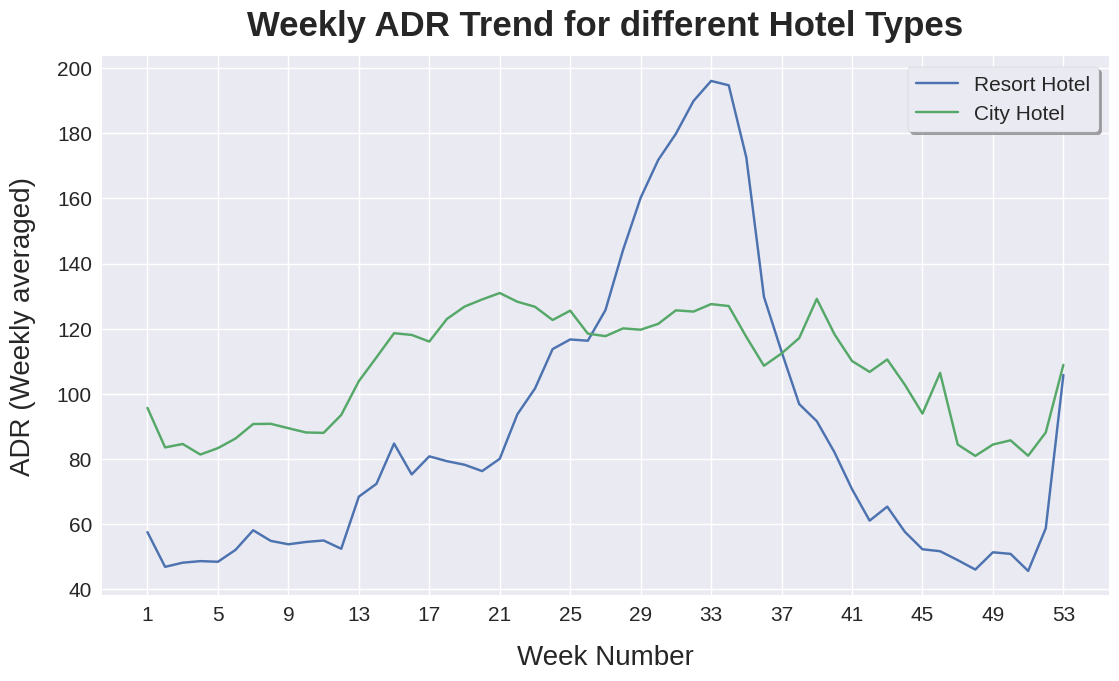

In [267]:
plt.figure(figsize=(13, 7))

# Group the DataFrame by 'arrival_date_week_number' and calculate the mean of 'adr' within each week

df_resort = df[df['hotel'] == 'Resort Hotel']
df_city = df[df['hotel'] == 'City Hotel']
grouped_df_resort = df_resort.groupby('arrival_date_week_number')['adr'].mean()
grouped_df_city = df_city.groupby('arrival_date_week_number')['adr'].mean()

# Create a line plot of 'adr' against 'arrival_date_week_number' for 'Resort Hotel'
plt.plot(grouped_df_resort.index, grouped_df_resort.values, label='Resort Hotel')

# Create a line plot of 'adr' against 'arrival_date_week_number' for 'City Hotel'
plt.plot(grouped_df_city.index, grouped_df_city.values, label='City Hotel')

# Add labels and title to the plot
plt.xlabel('Week Number', labelpad=15)
plt.ylabel('ADR (Weekly averaged)', labelpad=15)
plt.title('Weekly ADR Trend for different Hotel Types', pad=15)
plt.legend(frameon = True, shadow = True)

# Set x-axis ticks every 4 weeks
plt.xticks(np.arange(1, 55, 4));

##### 1. Why did you pick the specific chart?

I chose a line plot to showcase the average weekly ADR (Average Daily Rate) on the y-axis and the week number on the x-axis for a few reasons. Firstly, a line plot is effective in displaying trends over time. By plotting the ADR values against the week numbers, we can easily visualize any changes, fluctuations, or patterns in ADR over the weeks. Secondly, the line plot allows for a clear representation of the overall trend and helps identify any peaks or dips in ADR. It enables us to analyze the data in a continuous manner, providing a comprehensive view of the ADR trend throughout the weeks. Finally, the line plot facilitates the comparison of ADR values between different weeks and helps understand the overall direction of ADR changes.

##### 2. What is/are the insight(s) found from the chart?

- ADR values for Resort Hotels are lower than City Hotels throughout the year, except between week 25 and 37
- ADR Values for Resort Hotels significantly rises up during the period of week 25 and week 37
- There is a peak of ADR value for resort hotel in week number 37 which is almost 1.8 times higher than the ADR value of City hotel
- There is no significant peak observed in the ADR line plot for City Hotel
- The ADR value of City hotels is least in between week 1 and 10, and between week 47 and 52

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the gained insights can potentially help create a positive business impact for both Resort Hotels and City Hotels.

Competitive Advantage of Resort Hotels: The insight that ADR values for Resort Hotels are consistently lower than City Hotels throughout most of the year indicates a competitive pricing advantage for Resort Hotels. This can attract price-sensitive travelers and contribute to increased bookings and occupancy rates, positively impacting revenue and market share.

Profitable Peak Season for Resort Hotels: The significant rise in ADR values for Resort Hotels during weeks 25 to 37 indicates a profitable peak season. During this period, Resort Hotels can leverage increased demand to charge higher rates, resulting in enhanced revenue and profitability.

Opportunity for Dynamic Pricing in Resort Hotels: The peak ADR value for Resort Hotels in week 37, being almost 1.8 times higher than City Hotels, presents an opportunity for dynamic pricing strategies. Implementing strategic pricing during this peak period can further boost revenue and capitalize on high-demand periods.

Stable ADR Trends for City Hotels: The insight that there are no significant peaks observed in the ADR line plot for City Hotels suggests a more stable pricing pattern. This stability can help build customer trust and attract business and corporate travelers seeking consistent pricing.

Opportunity for Special Promotions in City Hotels: The observation that City Hotel ADR is least between weeks 1 and 10, and weeks 47 and 52, presents an opportunity for targeted marketing and special promotions. Offering discounts or value-added packages during these quieter periods can attract guests and help maintain occupancy rates.

Are there any insights that lead to negative growth? Justify with specific reasons

The insights provided do not inherently lead to negative growth. However, businesses should be cautious in their approach to leverage these insights effectively:

Managing Peak Season for Resort Hotels: While the peak season during weeks 25 to 37 presents an opportunity for increased ADR, businesses need to manage higher demand efficiently. Ensuring high-quality service, managing capacity, and anticipating guest needs are essential to avoid negative impacts on customer experience.

Balancing Discounts in City Hotels: While offering special promotions during quieter periods can attract guests, businesses should carefully balance discounted rates. Excessive discounts could lead to revenue loss or potential negative impacts on profit margins.

Overall, by leveraging these insights effectively and employing data-driven pricing and marketing strategies, businesses can enhance their competitiveness, optimize revenue, and create a positive impact on growth and profitability. Continuous monitoring of market dynamics and customer feedback is crucial to adjust strategies dynamically and ensure long-term business success.








#### 23) Visualize the number of bookings per month for each year, helping detect seasonal patterns.

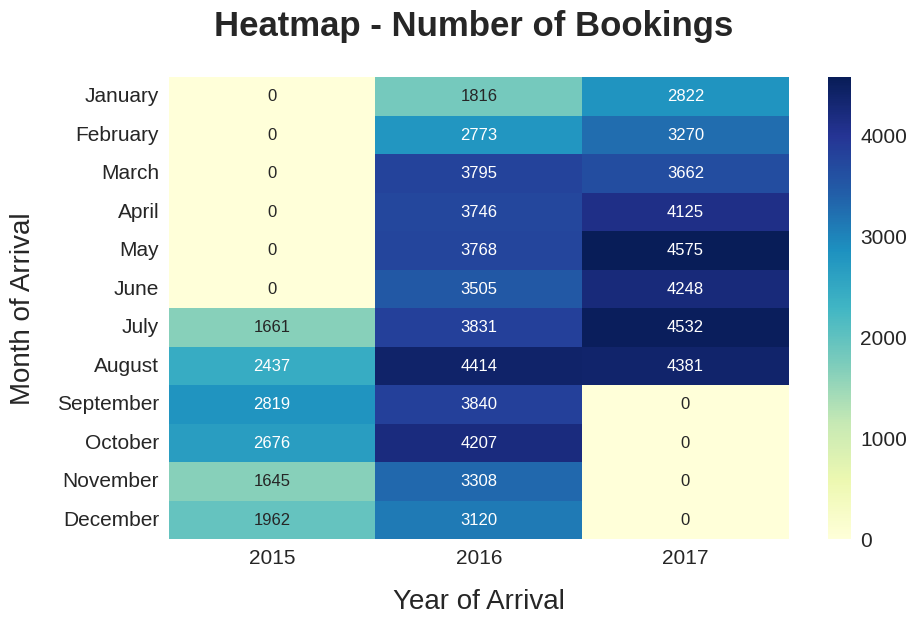

In [268]:
# Define a custom sort order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to a categorical data type with the custom sort order
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Create a pivot table to count the number of bookings per month for each year
pivot_df = df.pivot_table(index='arrival_date_month', columns='arrival_date_year', values='hotel', aggfunc='size', fill_value=0)

# Create the Count Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Year of Arrival', labelpad = 15)
plt.ylabel('Month of Arrival', labelpad = 15)
plt.title('Heatmap - Number of Bookings ', pad = 30);

##### 1. Why did you pick the specific chart?

I chose the Count Heatmap by 'arrival_date_year' and 'arrival_date_month' because it allows us to see the number of bookings made for each month in different years. By visualizing the data in this way, we can easily detect any seasonal patterns or trends in the booking behavior. The heatmap's color intensity represents the booking count, with darker colors indicating higher booking numbers and lighter colors indicating lower numbers. This helps us understand if there are specific months or seasons when bookings are more frequent or less frequent, which can be crucial for businesses in the hospitality industry to plan and optimize their operations and marketing strategies.

##### 2. What is/are the insight(s) found from the chart?

- The dataset contains NULL values for the initial months of 2015 and ending months of 2017, indicating that data collection was conducted from July 2015 to August 2017, covering a period of two years and two months.
- The highest number of Bookings is observed in July 2017, with a total of 4575.
- Comparing yearly, the July month has shown an increasing trend of bookings, with 1661 in 2015, 3831 in 2016 and 4532 in 2017

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact. The data shows an increasing trend in bookings for the month of July over the three years, with the highest number of bookings in July 2017. This trend indicates a favorable period for the business, and it might be beneficial to focus marketing efforts and promotions during July to attract more customers. However, the NULL values in the initial months of 2015 and ending months of 2017 might limit the accuracy of the analysis and decision-making for those specific time periods. Ensuring complete and reliable data collection for all months would be essential to avoid any negative impact on business planning and strategies.

#### 24) Correlation heatmap of numberical variables.

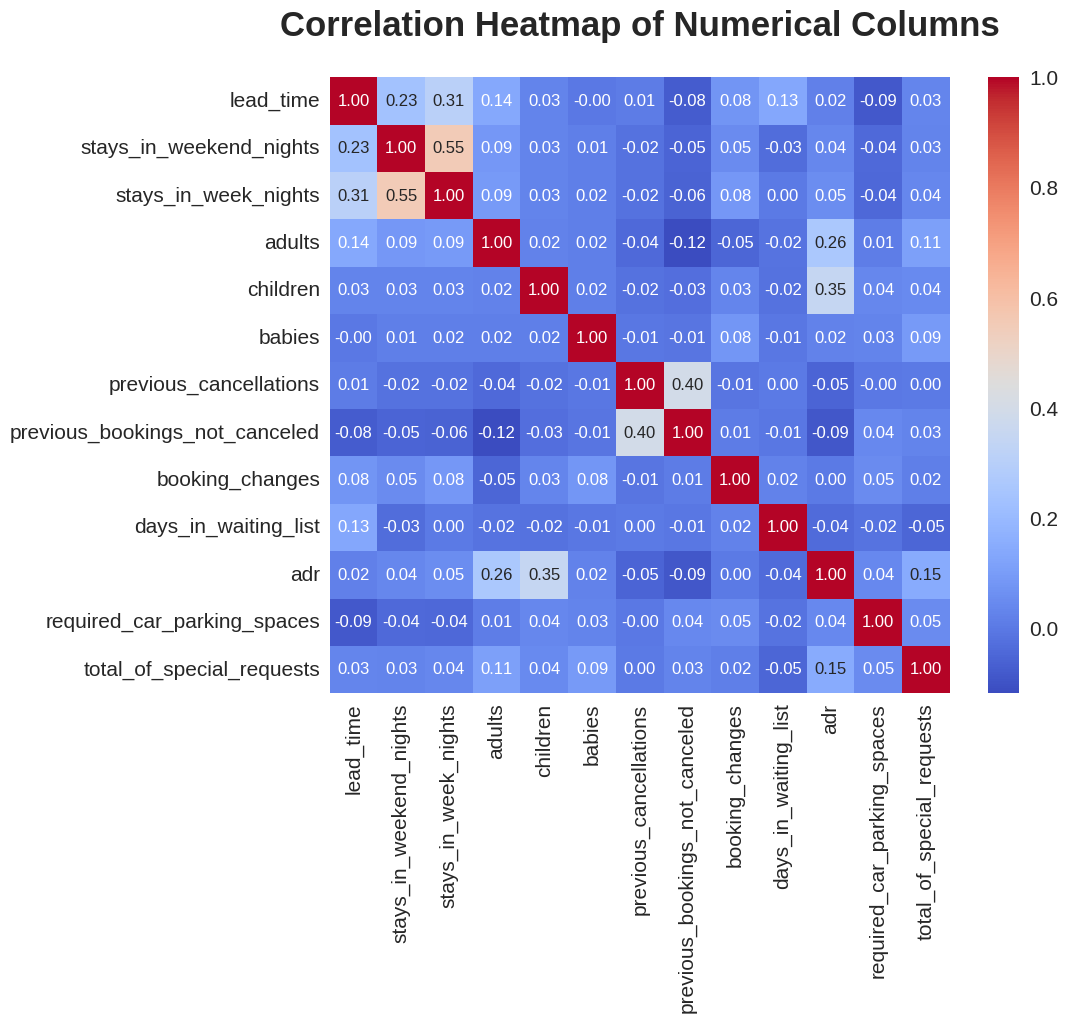

In [269]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns', pad = 30);

##### 1. Why did you pick the specific chart?

I chose the correlation heatmap to understand how the numerical variables in the DataFrame are related to each other. The heatmap displays a color-coded matrix, making it easy to spot strong positive or negative relationships. It helps identify which variables move together or move in opposite directions. This visualization helps me explore potential patterns and dependencies among the numerical data quickly. By using the correlation heatmap, I can gain insights into which variables might have the most impact on others, guiding me in making data-driven decisions and understanding important relationships in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- There is no strong correlation coefficient found among the variables as none of the values is close to 1 or -1
- The highest positive correlation was found to be 0.55 between 'stays_in_weeken_nights' and 'stays_in_week_nights'
- The Second highest positive correlation was found to be 0.40 between 'previous_cancellations' and 'previous_bookings_not_cancelled'
- The Third highest positive correlation was found to be 0.35 between 'children' and 'adr'
- The Hihest negative correlation was found to be -0.12 between 'adults' and 'previous_bookings_not_cancelled'

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights about the correlation coefficients indicate that there are no strong linear relationships among the variables. However, some moderate positive correlations exist, such as between 'stays_in_weekend_nights' and 'stays_in_week_nights', and 'previous_cancellations' and 'previous_bookings_not_canceled'. On the other hand, the highest negative correlation between 'adults' and 'previous_bookings_not_canceled' is weak. While these insights can inform decision-making, it is important to note that correlation does not imply causation. Therefore, businesses should use these insights cautiously and consider other factors to avoid making decisions based solely on correlation values.

#### 25) Pair plot of Numerical variables in the dataset.

<Figure size 1200x1200 with 0 Axes>

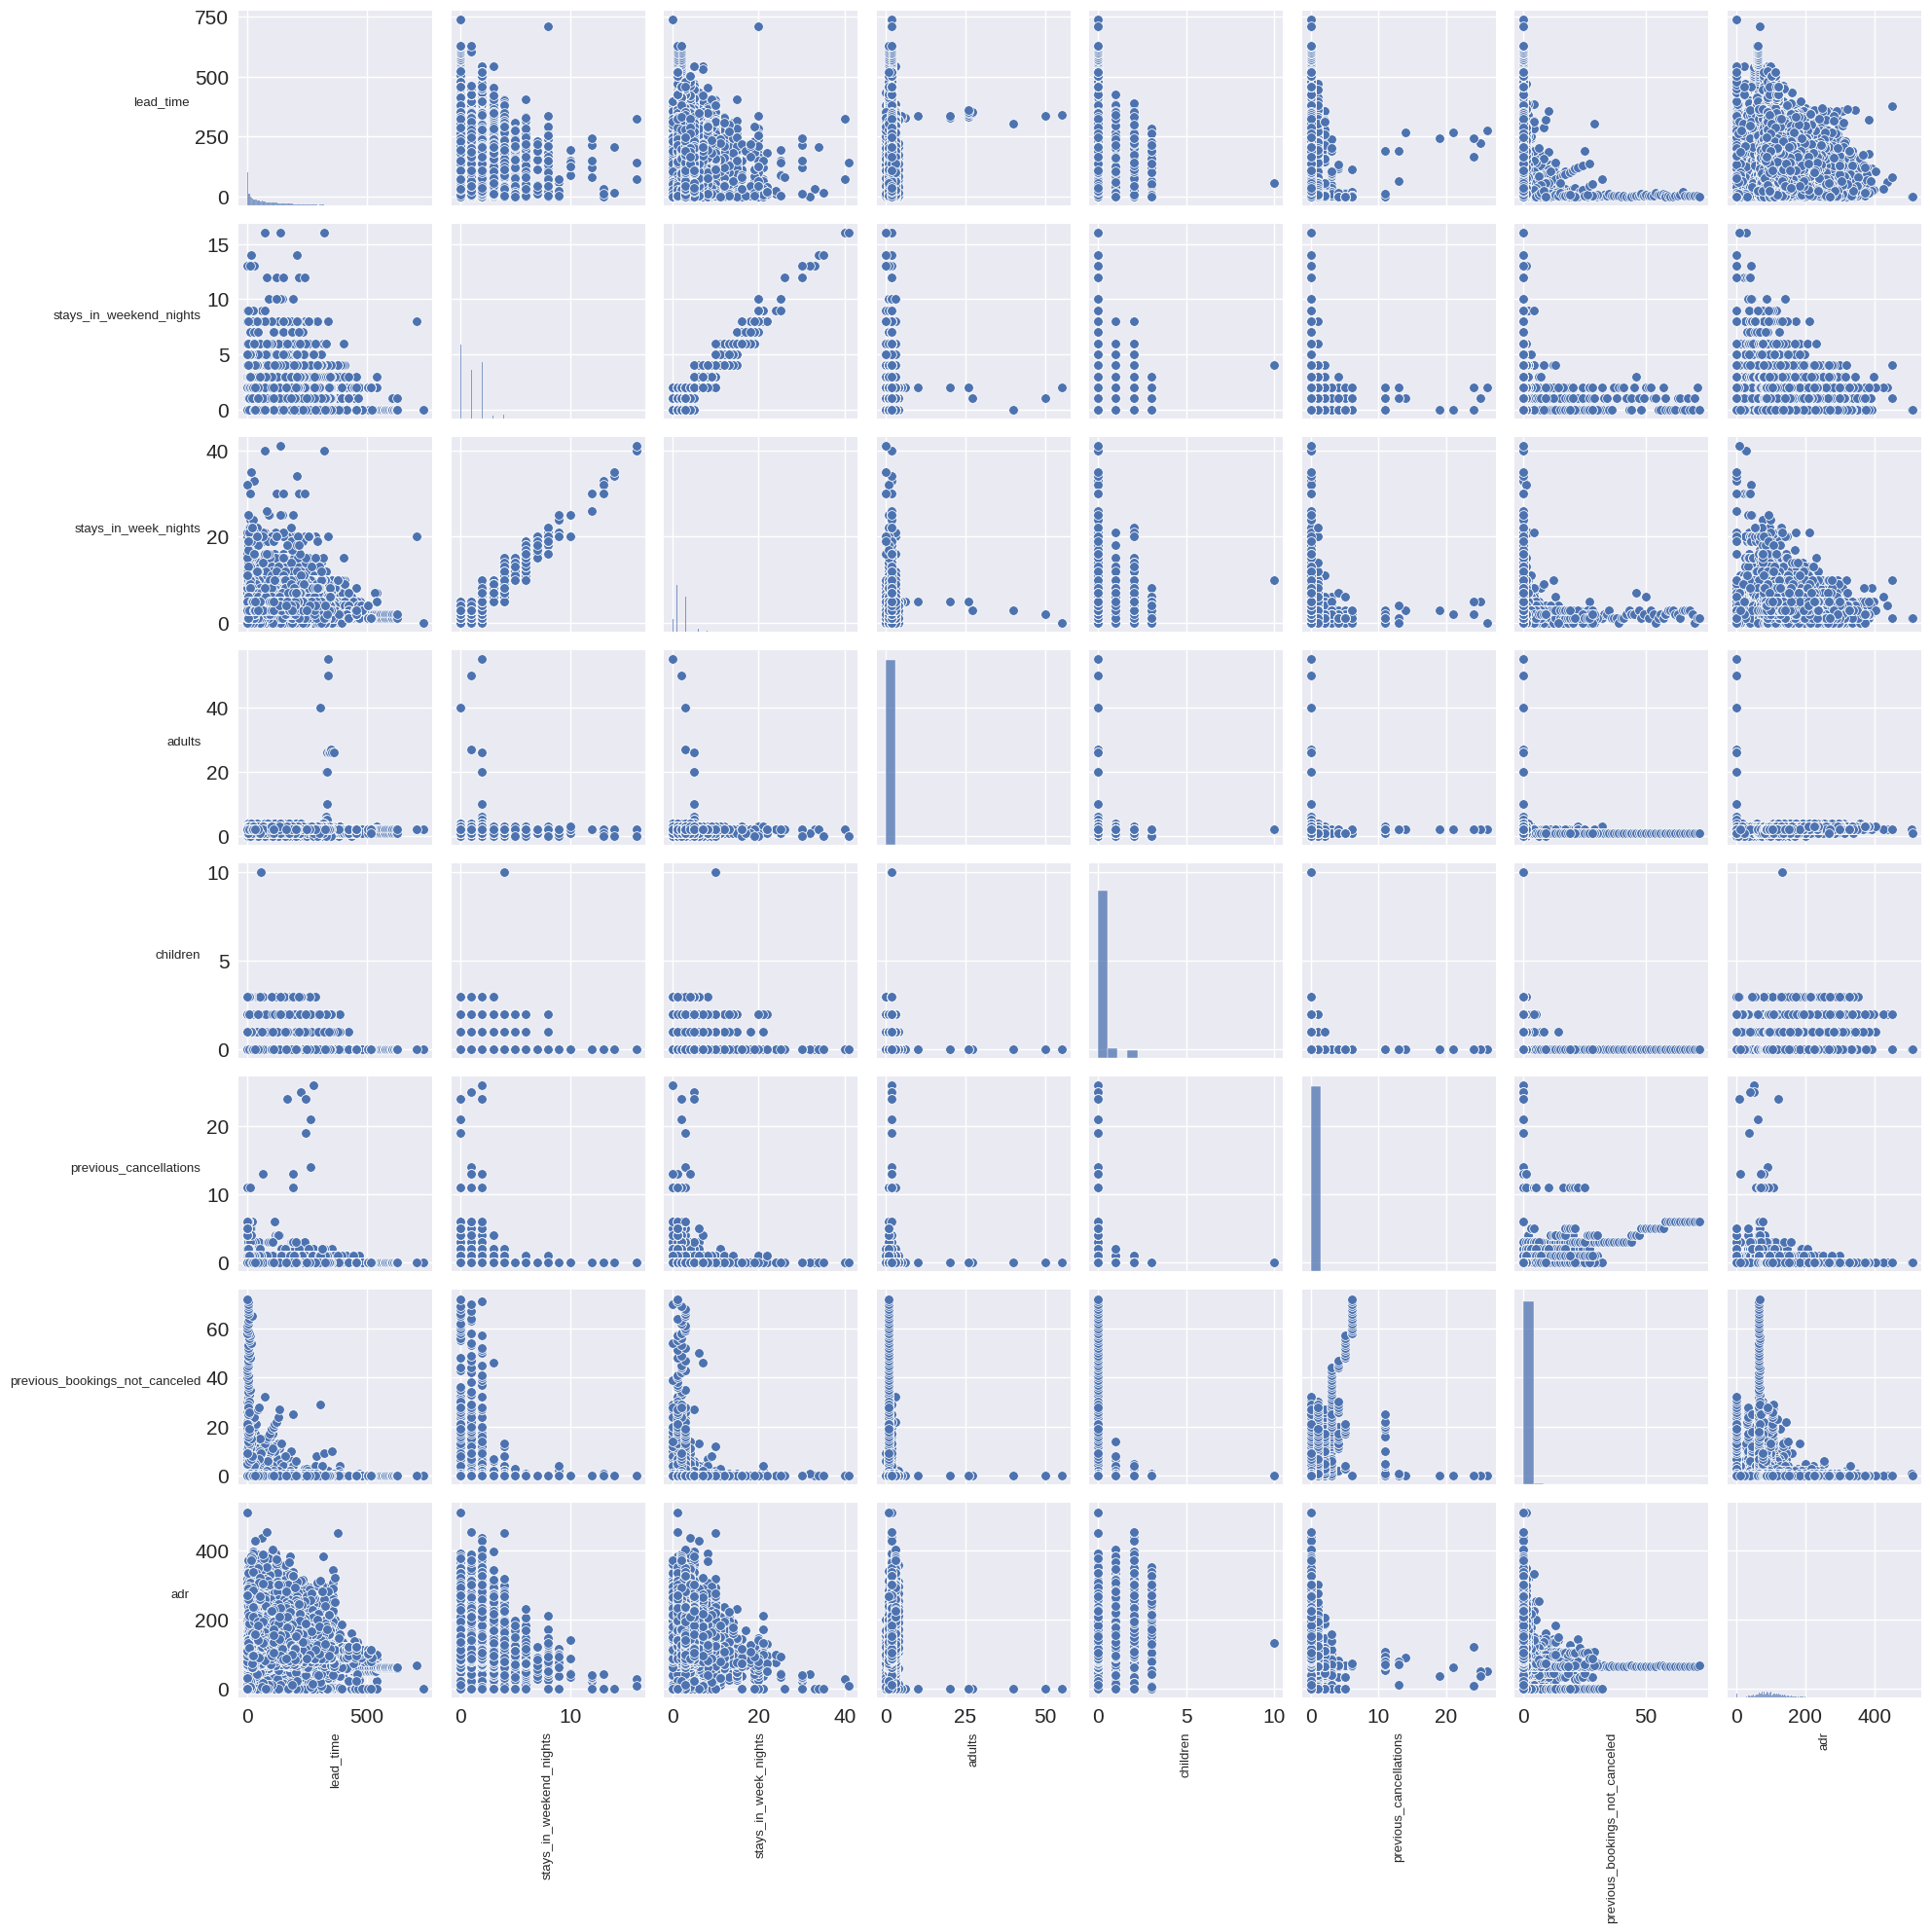

In [270]:
# Pair plot
plt.figure(figsize=(12, 12))
# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a mask to exclude the diagonal elements (correlation of a variable with itself)
mask = (correlation_matrix.abs() > 0.25) & (correlation_matrix.abs() < 1.0)  # Filtering for > 0.25 and < 1.0

# Filter columns based on correlation coefficients > 0.25 or < -0.25
selected_columns = correlation_matrix.columns[mask.any()]


# Create pair plots for selected columns
pairplot = sns.pairplot(df_numerical[selected_columns])

for ax in pairplot.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation=90, fontsize = 9.5)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation=0, fontsize = 9.5)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.tight_layout();  # Adjust the layout to prevent label overlapping


##### 1. Why did you pick the specific chart?

I chose to create a pair plot for numerical values with an absolute correlation coefficient greater than 0.25 because it helps visualize relationships between variables that might have a moderate or stronger correlation. The plot allows us to quickly identify patterns and associations among these variables, aiding in understanding their potential influence on each other. By focusing on correlations above 0.25 or below -0.25, we can pinpoint significant relationships that may be relevant for analysis and decision-making, helping us explore which variables might be more influential in the dataset.

##### 2. What is/are the insight(s) found from the chart?

'stays_in_weeken_nights' and 'stays_in_week_nights' seems to be positively correlated, other than that the whole pair plots are looking obscure

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The positively correlated 'stays_in_weeken_nights' and 'stays_in_week_nights' may indicate that guests who stay more on weekdays also tend to stay more on weekends. This insight might help optimize room availability and staffing on weekends based on weekday bookings. However, the overall pair plots are unclear, making it challenging to draw strong conclusions. The lack of clear insights may not have a significant positive business impact. Still, it's essential to explore the data further to find more actionable insights that could lead to positive growth opportunities.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1)	Target Marketing Efforts: Capitalize on the market dominance of Portugal (PRT) by focusing marketing efforts on attracting more Portuguese guests. Tailor promotions and offerings to cater to their preferences.

2)	International Expansion: Leverage the international reach of the business by developing targeted marketing campaigns for countries like the United Kingdom (GBR), France (FRA), Spain (ESP), Germany (DEU), Italy (ITA), and Ireland (IRL) to further increase bookings from these regions.

3)	Regional Marketing: Given the presence of neighboring countries like Belgium (BEL) and the Netherlands (NLD) in the top 10 guest count, consider region-specific marketing strategies to attract guests from nearby areas.

4)	Seasonal Promotions: Utilize seasonal variation insights to offer special deals and promotions during peak months like July and August to maximize bookings during high-demand periods.

5)	Off-Peak Strategies: Implement targeted marketing campaigns during lower booking months such as January and November, offering discounts or packages to increase bookings during quieter periods.

6)	Direct Booking Incentives: Further promote direct bookings through the hotel's channels by offering loyalty rewards, exclusive discounts, or special perks for customers who book directly.

7)	Corporate Partnership Enhancement: Strengthen corporate partnerships to attract more business travelers. Offer tailored services and amenities to cater to the needs of corporate guests.

8)	Optimize Pricing: Analyze the average daily rate (ADR) trends and implement dynamic pricing strategies to maximize revenue during peak periods and offer competitive rates during off-peak periods.

9)	Monitor Booking Changes: Keep track of customer booking changes to understand preferences and tailor services accordingly. Higher booking changes may indicate interest and engagement with the booking.

10)	Reduce Cancellation Rate: Since City Hotels have a higher cancellation rate, identify the reasons behind cancellations and implement measures to reduce them, such as flexible cancellation policies or incentives for non-cancellation.

11)	Enhance Guest Experience: Continuously improve guest experience to encourage repeat bookings. Implement feedback systems and focus on providing excellent service.

12)	Capitalize on Room Types: As customers prefer Room types 'A', 'D', and 'E', promote these room types with attractive images and descriptions to increase bookings.

13)	Utilize Travel Agents and Tour Operators: Strengthen partnerships with travel agents and tour operators to drive more bookings through this dominant distribution channel.

14)	Leverage Seasonal Demand: During weeks with higher ADR values (e.g., week 33), consider offering premium services or exclusive experiences to capitalize on increased demand.

15)	Optimize ADR for Resort Hotels: Analyze the ADR variation between Resort and City Hotels and consider pricing adjustments during specific weeks (e.g., week 25 to 37) to attract more customers to Resort Hotels

# **Conclusion**

#### After completing the Exploratory Data Analysis (EDA) of the Hotel Booking Analysis dataset, we have gained valuable insights that can help the business owner enhance bookings and optimize operations. Let's summarize our findings:

## Data Overview
We started by getting familiar with the dataset using Pandas, which allowed us to understand its structure and the types of information available. The dataset contains a variety of features related to hotel bookings, including booking dates, guest information, room type, and other relevant details.

## Data Cleaning
Data cleaning is a crucial step in any data analysis project. We applied various data wrangling techniques to handle missing values, duplicate entries, and inconsistent data. By cleaning the data, we ensured the accuracy and reliability of our analysis.

## Data Analysis (UBM)
We performed a comprehensive analysis of the data, focusing on Univariate, Bivariate, and Multivariate (UBM) analysis.

### Univariate Analysis:
In the Univariate analysis, we examined individual features to understand their distributions and characteristics. This analysis provided us with insights into booking patterns, customer preferences, and peak booking periods.

### Bivariate Analysis:
In the Bivariate analysis, we explored relationships between pairs of variables. By studying correlations and associations, we identified factors that influenced booking outcomes. For instance, we discovered that the duration between booking and check-in date strongly impacted cancellation rates.

### Multivariate Analysis:
In the Multivariate analysis, we delved deeper by considering multiple variables simultaneously. This analysis allowed us to uncover complex interactions and dependencies between different features. For example, we found that certain customer segments preferred specific room types, leading to potential targeted marketing opportunities.

## Business Insights
Based on our analysis, here are some key insights and actionable recommendations for the business owner:

1. **Target Marketing Efforts:** Capitalize on the market dominance of Portugal (PRT) by focusing marketing efforts on attracting more Portuguese guests. Tailor promotions and offerings to cater to their preferences.

2. **International Expansion:** Leverage the international reach of the business by developing targeted marketing campaigns for countries like the United Kingdom (GBR), France (FRA), Spain (ESP), Germany (DEU), Italy (ITA), and Ireland (IRL) to further increase bookings from these regions.

3. **Regional Marketing:** Given the presence of neighboring countries like Belgium (BEL) and the Netherlands (NLD) in the top 10 guest count, consider region-specific marketing strategies to attract guests from nearby areas.

4. **Seasonal Promotions:** Utilize seasonal variation insights to offer special deals and promotions during peak months like July and August to maximize bookings during high-demand periods.

5. **Off-Peak Strategies:** Implement targeted marketing campaigns during lower booking months such as January and November, offering discounts or packages to increase bookings during quieter periods.

6. **Direct Booking Incentives:** Further promote direct bookings through the hotel's channels by offering loyalty rewards, exclusive discounts, or special perks for customers who book directly.

7. **Corporate Partnership Enhancement:** Strengthen corporate partnerships to attract more business travelers. Offer tailored services and amenities to cater to the needs of corporate guests.

8. **Enhance Guest Experience:** Continuously improve guest experience to encourage repeat bookings. Implement feedback systems and focus on providing excellent service.


## Final Remarks
In conclusion, the Exploratory Data Analysis of the Hotel Booking Analysis dataset has provided valuable insights into guest behaviors, booking patterns, and potential areas of improvement. By leveraging these insights, the business owner can make informed decisions to drive more bookings, increase revenue, and enhance the overall guest experience. Continued monitoring and analysis of data will be essential to adapt to changing trends and customer preferences in the highly dynamic hospitality industry.
